In [207]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

import pylab as plt
import numpy as np
import seaborn as sns; sns.set()

import time

import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
import tensorflow as tf 

from keras import regularizers

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from keras.layers import Lambda, Input, Dense
from keras.models import Model
from keras.datasets import mnist
from keras.losses import mse, binary_crossentropy
from keras.utils import plot_model
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt
import argparse
import os

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }


Input variables (based on physicochemical tests): 

-   1 - fixed acidity 
- 2 - volatile acidity 
- 3 - citric acid 
- 4 - residual sugar 
- 5 - chlorides 
- 6 - free sulfur dioxide 
- 7 - total sulfur dioxide 
- 8 - density 
- 9 - pH 
- 10 - sulphates 
- 11 - alcohol 

Output variable (based on sensory data): 

- *12 - quality (score between 0 and 10) 

 * First goal: analyse goodness of a given whine for white and red wine 
 * Second goal: determine goodness of wine without prior knowledge on its category ie red or wine 

In [2]:
kaggle_df  = pd.read_csv('./data/winequality-red.csv')

data_path_red = './data/winequality/winequality-red.csv'
data_path_white = './data/winequality/winequality-white.csv'

wine_df_red = pd.read_csv(data_path_red, sep = ';')
wine_df_white = pd.read_csv(data_path_white, sep = ';')

In [3]:
wine_df_red.columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']
wine_df_red.columns, wine_df_white.columns = wine_df_red.columns, wine_df_red.columns

# Simple analysis

In [61]:
x, y = 5, 5

## White wine 

In [4]:
wine_df_white.tail(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [5]:
wine_df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed_acidity           4898 non-null float64
volatile_acidity        4898 non-null float64
citric_acid             4898 non-null float64
residual_sugar          4898 non-null float64
chlorides               4898 non-null float64
free_sulfur_dioxide     4898 non-null float64
total_sulfur_dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [6]:
wine_df_white.groupby('quality').fixed_acidity.value_counts()

quality  fixed_acidity
3        6.1               2
         7.1               2
         4.2               1
         5.8               1
         6.2               1
         6.7               1
         6.8               1
         6.9               1
         7.5               1
         7.6               1
         7.9               1
         8.3               1
         8.5               1
         8.6               1
         9.1               1
         9.4               1
         10.3              1
         11.8              1
4        6.9              12
         6.8              11
         6.5               9
         7.6               9
         6.4               8
         6.0               7
         6.1               7
         6.3               7
         7.1               7
         7.2               7
         6.2               5
         6.7               5
                          ..
8        6.2               7
         6.4               6
         7.6        

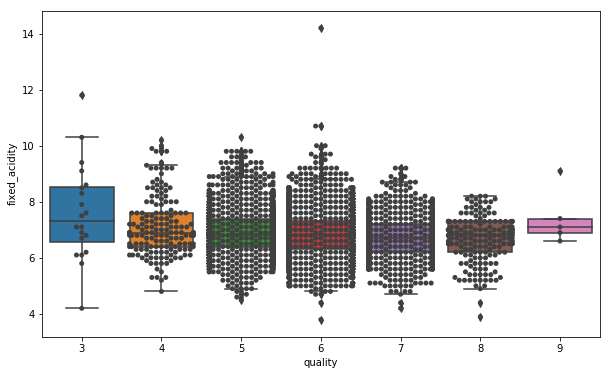

In [77]:
fig = plt.figure(figsize = (10,6))
ax = sns.boxplot( x = 'quality', y = 'fixed_acidity', data = wine_df_white )
ax = sns.swarmplot(x = 'quality', y = 'fixed_acidity', data = wine_df_white, color='.25')

### Comments 
We don't have so much data for certain values of quality. It is logical as very bad and very good wine are more rare. 

Fixed_acidity does not seem to really influence the quality here

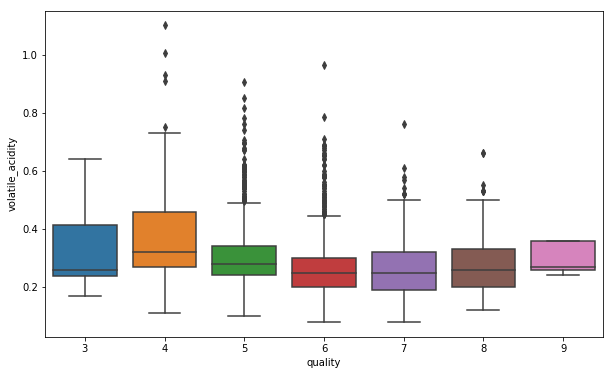

In [79]:
fig = plt.figure(figsize = (10,6))
ax = sns.boxplot( x = 'quality', y = 'volatile_acidity', data = wine_df_white )


### Comments 
It is still not easy to see the influence of volatile acidity on the quality value. However we see more variation than with the Fixed_acidity. 

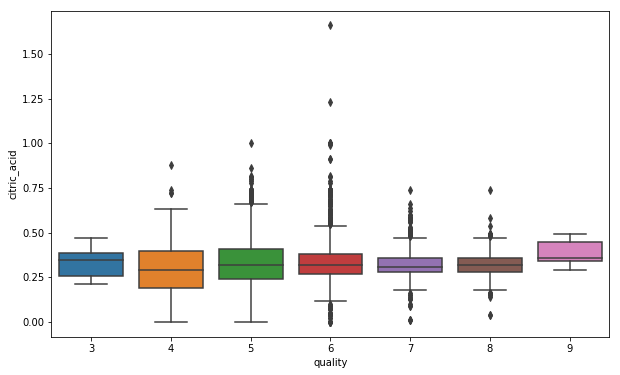

In [82]:
fig = plt.figure(figsize = (10,6))
ax = sns.boxplot( x = 'quality', y = 'citric_acid', data = wine_df_white )

### Comments 
Here we can assess that globally if citric acid increase then we get a better white wine 

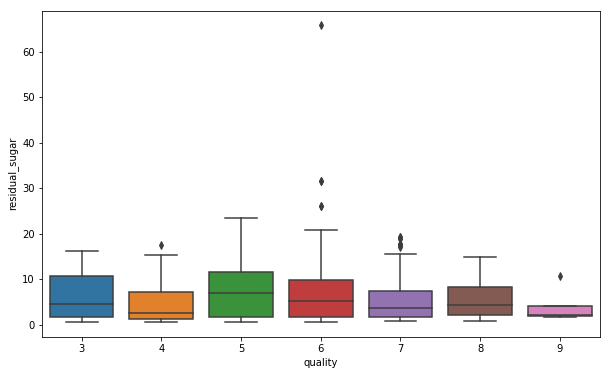

In [85]:
fig = plt.figure(figsize = (10,6))
ax = sns.boxplot( x = 'quality', y = 'residual_sugar', data = wine_df_white )

### Comments 
Difficult to make any comment

In [86]:
wine_df_white.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

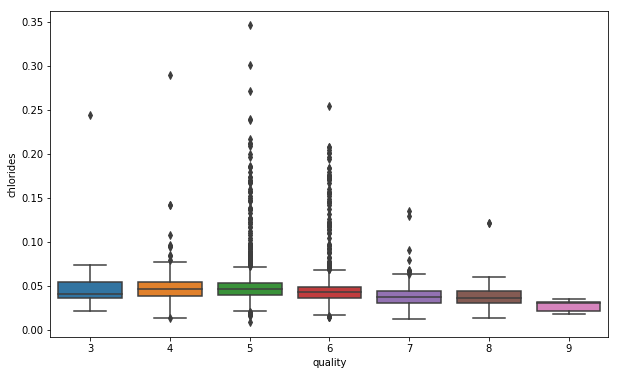

In [87]:
fig = plt.figure(figsize = (10,6))
ax = sns.boxplot( x = 'quality', y = 'chlorides', data = wine_df_white )

### Comments 
It would seem that an overall decrease of chlorides leads to a better white wine

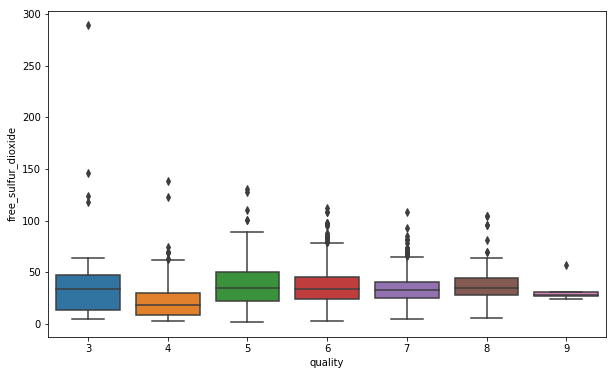

In [88]:
fig = plt.figure(figsize = (10,6))
ax = sns.boxplot( x = 'quality', y = 'free_sulfur_dioxide', data = wine_df_white )

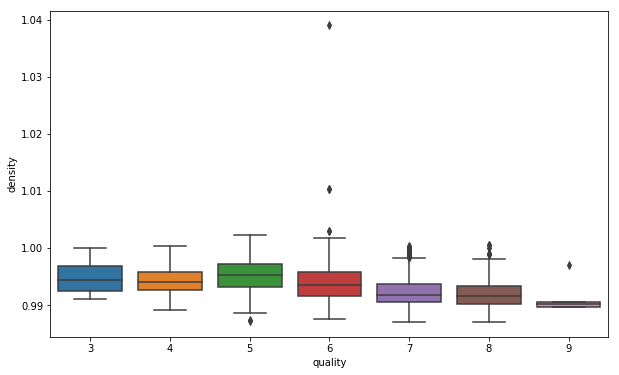

In [89]:
fig = plt.figure(figsize = (10,6))
ax = sns.boxplot( x = 'quality', y = 'density', data = wine_df_white )

### Comments 
Good white wines seem to have a low density. The lower the density the better in general. 

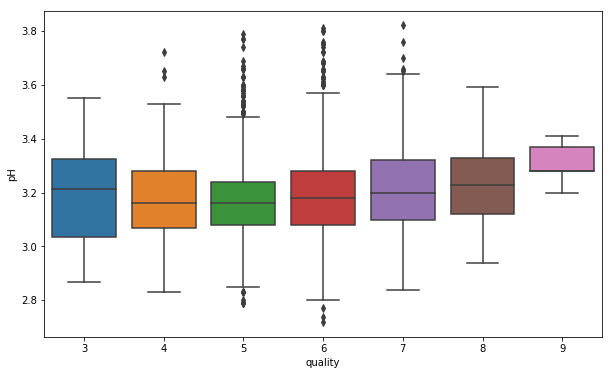

In [90]:
fig = plt.figure(figsize = (10,6))
ax = sns.boxplot( x = 'quality', y = 'pH', data = wine_df_white )

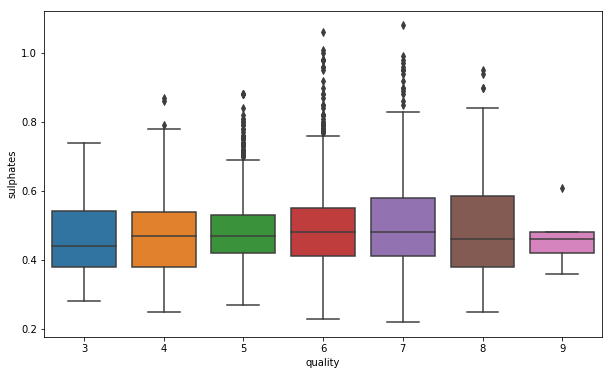

In [91]:
fig = plt.figure(figsize = (10,6))
ax = sns.boxplot( x = 'quality', y = 'sulphates', data = wine_df_white )

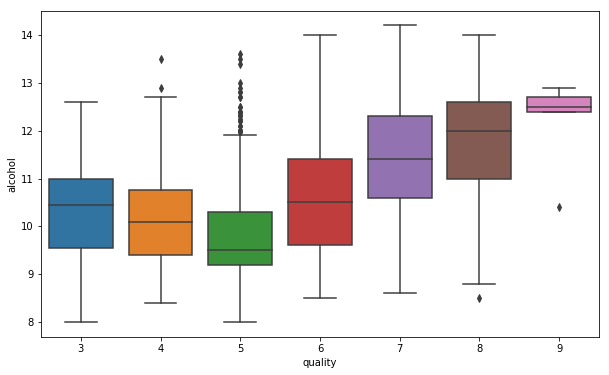

In [93]:
fig = plt.figure(figsize = (10,6))
ax = sns.boxplot( x = 'quality', y = 'alcohol', data = wine_df_white )

### Comments 
Good white wines seem to have a high level of alcohol. 

## Summary of Part1: Very Simple Analaysis
    
   * Good white wines seem to have a high level of alcohol.
   * Good white wines seem to have a low density. The lower the density the better in general. 
   * It would seem that an overall decrease of chlorides leads to a better white wine
   * Here we can assess that globally if citric acid increase then we get a better white wine 
   * We do not have a lot of data for very good wine and very poor wine

C:\Users\Mous\Programmes\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


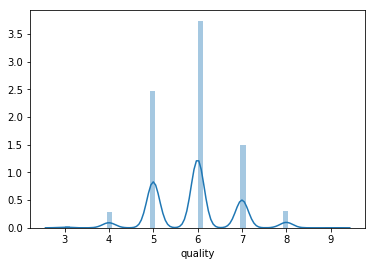

In [7]:
sns.distplot(wine_df_white['quality'])

In [15]:
corr = wine_df_white.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True],
       [False, False, False, False, False, False, False, False,  True,
         True,  True,  True],
       [False, False, False, False, False, False, False, False, False,
         True,  True

### Correlation matrix 

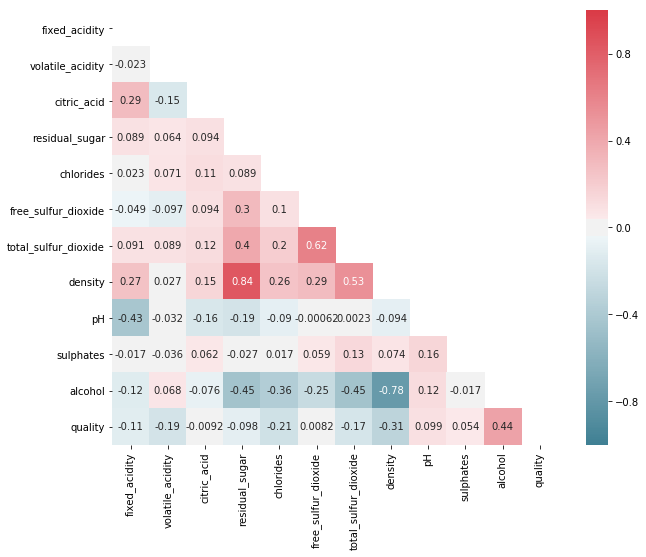

In [14]:
fig, ax = plt.subplots(figsize = [10,8])

corr = wine_df_white.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Color Map
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr,annot=True, ax = ax, vmin=-1, vmax=1, cmap=cmap, mask=mask)
plt.show()

### We compare the correlation factors with the target feature: quality
* alcohool and quality: 0.44 
* density and quality: -0.31
* chlorides and quality: -0.21 
* volatile_acidity and quality: -.19 
* fixed_acidity and quality: -0.11 

Residual sugar and density very highly correlated: 0.84 ( maybe we can drop one of the columns ) 

Density and alcohol very highly correlated: -0.78 



    


In [49]:
from scipy.cluster import hierarchy as hc

In [51]:
corr

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile_acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric_acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual_sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free_sulfur_dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total_sulfur_dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


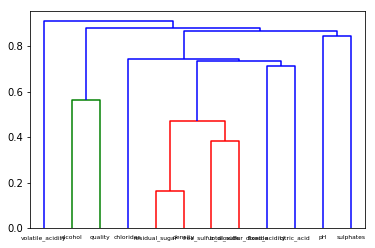

In [68]:
corr = 1-wine_df_white.corr()

corr_condensed = hc.distance.squareform(corr) # convert to condensed
z = hc.linkage(corr_condensed, method='single')
dendrogram = hc.dendrogram(z, labels=corr.columns, leaf_font_size=6)
plt.savefig('foo.png')
plt.show()


In [69]:
dendrogram['ivl']

['volatile_acidity',
 'alcohol',
 'quality',
 'chlorides',
 'residual_sugar',
 'density',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'fixed_acidity',
 'citric_acid',
 'pH',
 'sulphates']

### COMMENTS

WARD and AVERAGE dendograms:

*  With this dendogram, we see that alcohool, quality, pH and sulphates are similar in the same 'cluster' based on their correlation factors with the other features. 

*  Residual sugar and density are connected very early in the tree. And we know density should have some link with alcohol. Maybe residual sugar is an interesting feature. 

Nearest Neighbor:
* Volatile acidity is forming a single cluster merging only at the end.

# Preprocessing

In [4]:
## Simple approach : Binary classification 

bins = (2, 6.5, 10)
labels = [-1, 1]

white_wine_binned = wine_df_white.copy( deep = True )
white_wine_binned['quality'] = pd.cut(white_wine_binned['quality'], bins = bins, labels = labels)

In [6]:
white_wine_binned.head(20)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,-1
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,-1
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,-1
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,-1
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,-1
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,-1
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,-1
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,-1
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,-1
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,-1


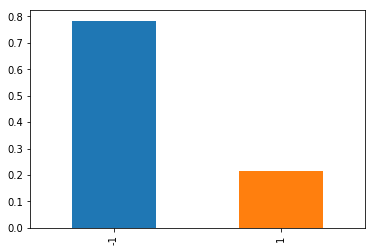

In [8]:
white_wine_binned['quality'].value_counts(normalize = True ).plot(kind='bar')

### Comments 
Highly unbalanced data here. We will use AUC and ROC curves to assess performance of our classifiers afterwards. 

In [9]:
white_wine_binned.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
scale_order = [-1, 1 ]
colors = {-1:'tomato', 1:'springgreen'}

scale_order_bg = [-1, 1]
colors_bg = {-1:'tomato', 1:'springgreen'}

In [8]:
cols = white_wine_binned.columns
white_wine_binned[[col for col in cols if col!='quality']]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000
1,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000
2,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000
3,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000
4,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000
5,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000
6,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.600000
7,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000
8,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000
9,8.1,0.220,0.43,1.50,0.044,28.0,129.0,0.99380,3.22,0.45,11.000000


C:\Users\Mous\Programmes\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Mous\Programmes\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


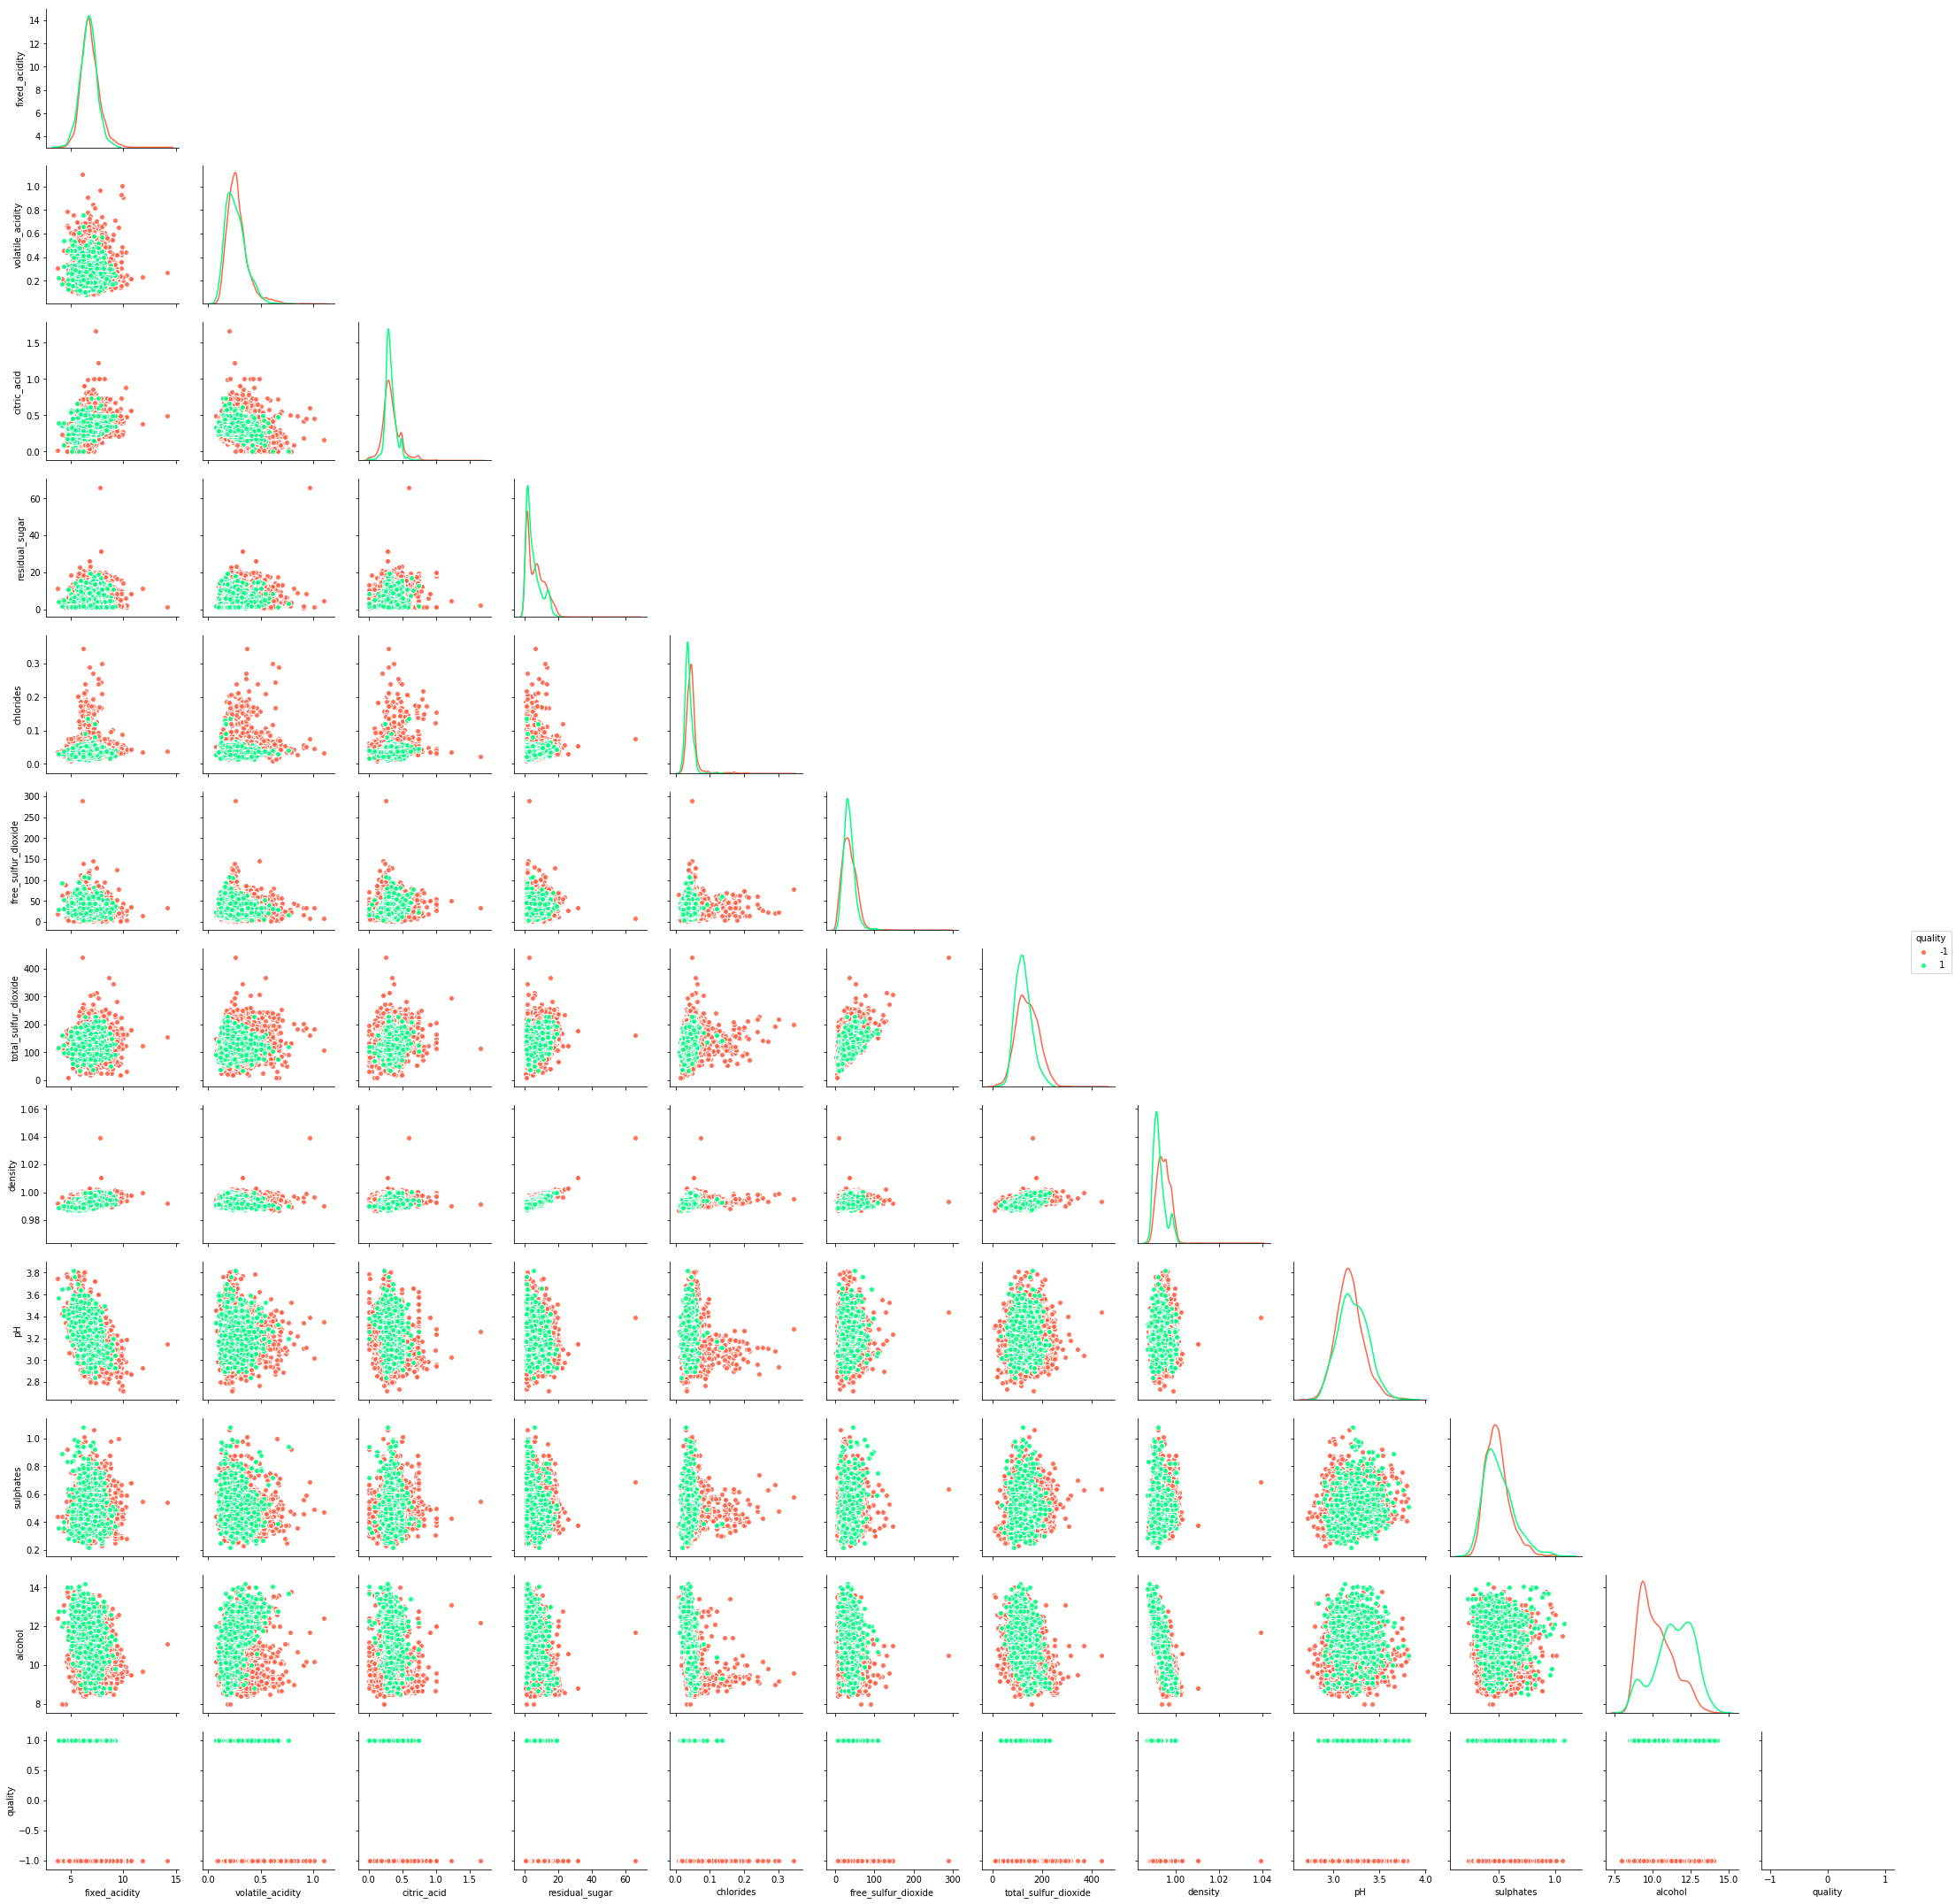

In [12]:
cols = white_wine_binned.columns
#cols = cols.drop('quality')

axPP = sns.pairplot( data = white_wine_binned[cols], hue = 'quality', hue_order=scale_order_bg, palette=colors_bg, plot_kws={'alpha' : 0.9}, diag_kind='kde')
for i, j in zip(*np.triu_indices_from(axPP.axes, 1)):
    axPP.axes[i, j].set_visible(False)
    
axPP.savefig("./Plots/distributions.png")

## FOCUS ON RESIDUAL SUGAR

C:\Users\Mous\Programmes\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


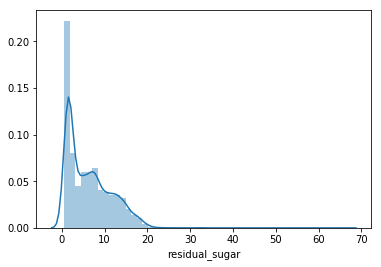

In [74]:
sns.distplot(wine_df_white['residual_sugar'])

C:\Users\Mous\Programmes\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


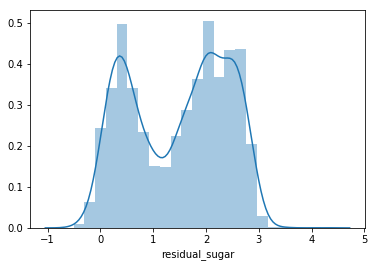

In [75]:
sns.distplot( np.log(wine_df_white['residual_sugar']) )

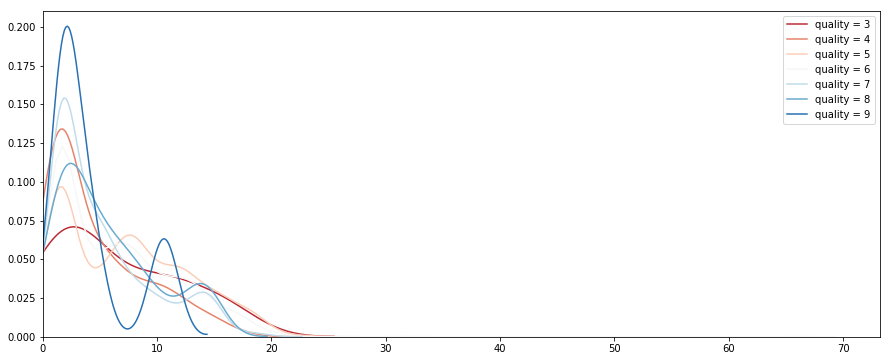

In [80]:
fig, ax = plt.subplots(figsize= [15,6])
palette = sns.color_palette("RdBu", n_colors=7)
for i in range(3,10):
    sns.kdeplot(wine_df_white.loc[wine_df_white.quality == i, 'residual_sugar'], label = 'quality = '+str(i), ax = ax, color = palette[i-3])
ax.set_xlim(left = 0)
plt.show()

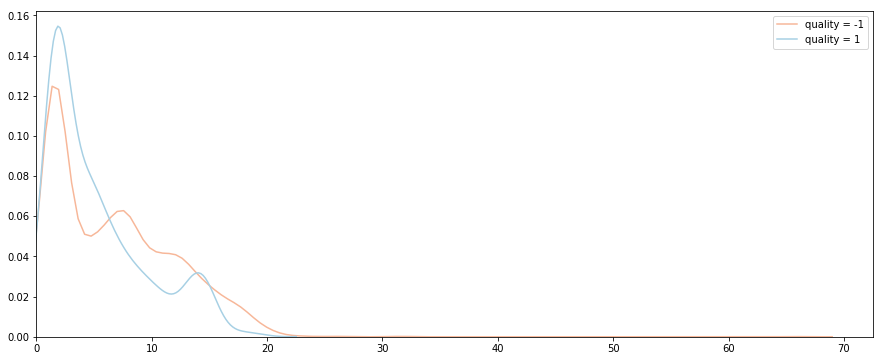

In [86]:
fig, ax = plt.subplots(figsize= [15,6])
palette = sns.color_palette("RdBu", n_colors=2)
labels = [-1, 1]
for i in range(2):
    sns.kdeplot(white_wine_binned.loc[white_wine_binned.quality == labels[i], 'residual_sugar'], label = 'quality = '+str(labels[i]), ax = ax, color = palette[i])

ax.set_xlim(left = 0)
plt.show()

In [85]:
white_wine_binned.residual_sugar.describe()

count    4898.000000
mean        6.391415
std         5.072058
min         0.600000
25%         1.700000
50%         5.200000
75%         9.900000
max        65.800000
Name: residual_sugar, dtype: float64

### Comments
We remark that the values of residual sugar are very much concentrated around zero and a large range is not represented.
Maybe the scale is not adapted and we need for example to take the logarithmic values of this feature

In [5]:
## Create new column of the logarithmic values of res_sugar
white_wine_binned["log_residual_sugar"] = np.log(white_wine_binned.residual_sugar)

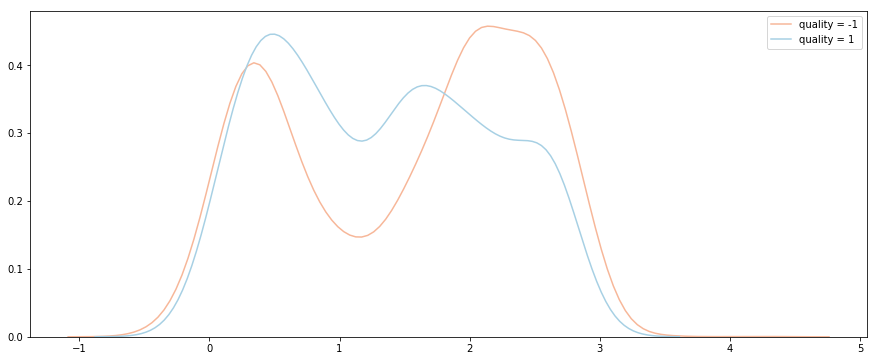

In [91]:
fig, ax = plt.subplots(figsize= [15,6])

palette = sns.color_palette("RdBu", n_colors=2)
labels = [-1, 1]

for i in range(2):
    sns.kdeplot(white_wine_binned.loc[white_wine_binned.quality == labels[i], 'log_residual_sugar'], label = 'quality = '+str(labels[i]), ax = ax, color = palette[i])

#ax.set_xlim(left = 0)
plt.show()

### Comments
With this feature alone, it is going to be difficult to separate the classes as the distributions given each class are very similar.

However this seems to be a better approach. We will use the logarithmic values of the feature residual_sugar

In [6]:
## Drop residual_sugar feature and keep only log
white_wine_binned = white_wine_binned.drop('residual_sugar', axis = 1)

## FOCUS ON pH 

C:\Users\Mous\Programmes\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


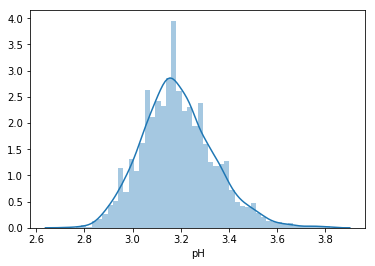

In [99]:
sns.distplot( white_wine_binned['pH'] )

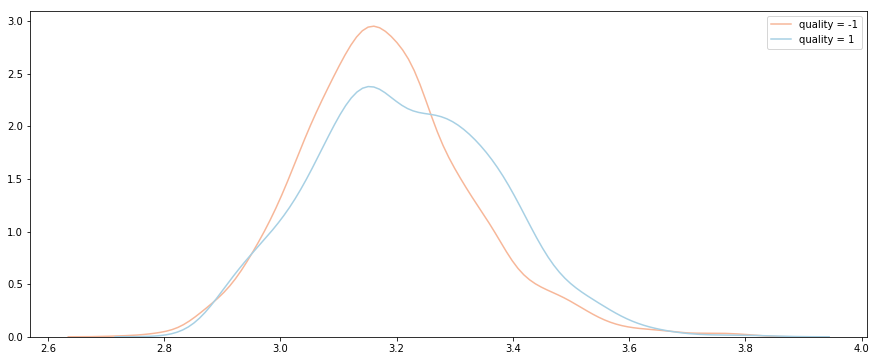

In [100]:
fig, ax = plt.subplots(figsize= [15,6])

palette = sns.color_palette("RdBu", n_colors=2)
labels = [-1, 1]

for i in range(2):
    sns.kdeplot(white_wine_binned.loc[white_wine_binned.quality == labels[i], 'pH'], label = 'quality = '+str(labels[i]), ax = ax, color = palette[i])

#ax.set_xlim(left = 0)
plt.show()

In [110]:
white_wine_binned.groupby(['quality'])['pH'].mean()

quality
-1    3.180847
 1    3.215132
Name: pH, dtype: float64

In [111]:
white_wine_binned.groupby(['quality'])['pH'].std()

quality
-1    0.148414
 1    0.157185
Name: pH, dtype: float64

### COMMENTS: 

Given each class, we have approximately the same distributions of the popoulation of pH with same variance and same mean. We could say that a priori pH is not so relevant. 

## FOCUS ON chlorides


C:\Users\Mous\Programmes\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


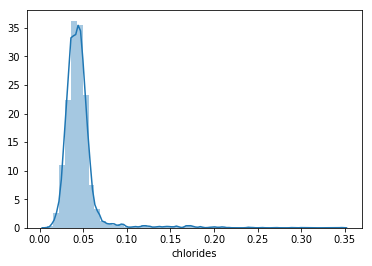

In [112]:
sns.distplot( white_wine_binned['chlorides'] )

C:\Users\Mous\Programmes\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


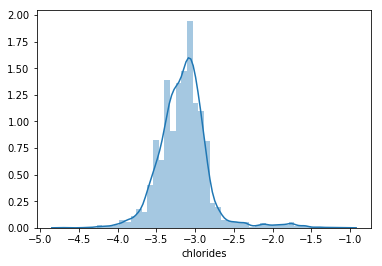

In [113]:
sns.distplot( np.log(white_wine_binned['chlorides']) )

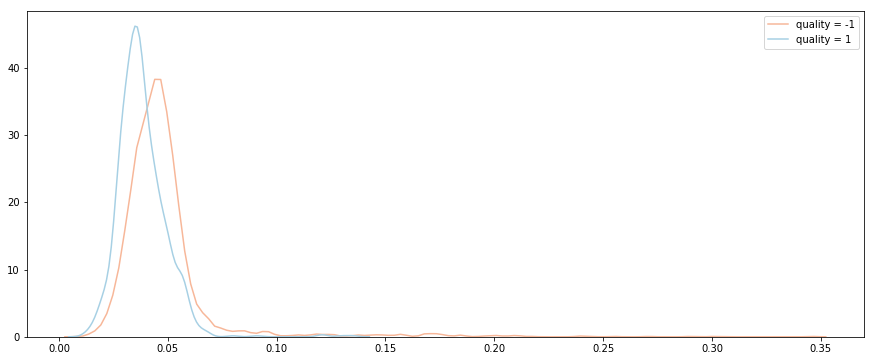

In [114]:
fig, ax = plt.subplots(figsize= [15,6])

palette = sns.color_palette("RdBu", n_colors=2)
labels = [-1, 1]

for i in range(2):
    sns.kdeplot(white_wine_binned.loc[white_wine_binned.quality == labels[i], 'chlorides'], label = 'quality = '+str(labels[i]), ax = ax, color = palette[i])

#ax.set_xlim(left = 0)
plt.show()

In [7]:
# Create log_chlorides feature 
white_wine_binned["log_chlorides"] = np.log(white_wine_binned.chlorides)

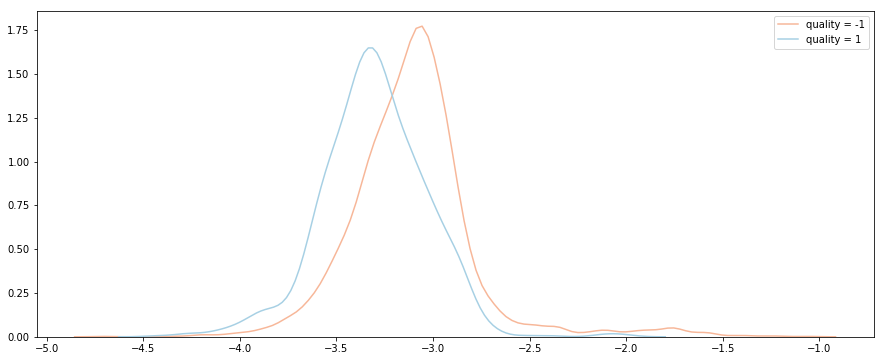

In [117]:
# PLOT the log of the chlorides observations given the classes
fig, ax = plt.subplots(figsize= [15,6])

palette = sns.color_palette("RdBu", n_colors=2)
labels = [-1, 1]

for i in range(2):
    sns.kdeplot(white_wine_binned.loc[white_wine_binned.quality == labels[i], 'log_chlorides'], label = 'quality = '+str(labels[i]), ax = ax, color = palette[i])

#ax.set_xlim(left = 0)
plt.show()

### Comments 
The overlap between the two distributions seem less important. In other words, it is easier to separate the two classes based only on this feature 'log_chlorides'

In [8]:
# DROP chlorides and only keep log_chlorides 
white_wine_binned = white_wine_binned.drop('chlorides', axis = 1)

In [76]:
white_wine_binned.tail()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,-1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,-1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,-1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,-1


In [9]:
### Change type of label from 'category' to float for using Correlation matrix after

white_wine_binned['quality'] = white_wine_binned['quality'].astype(float)

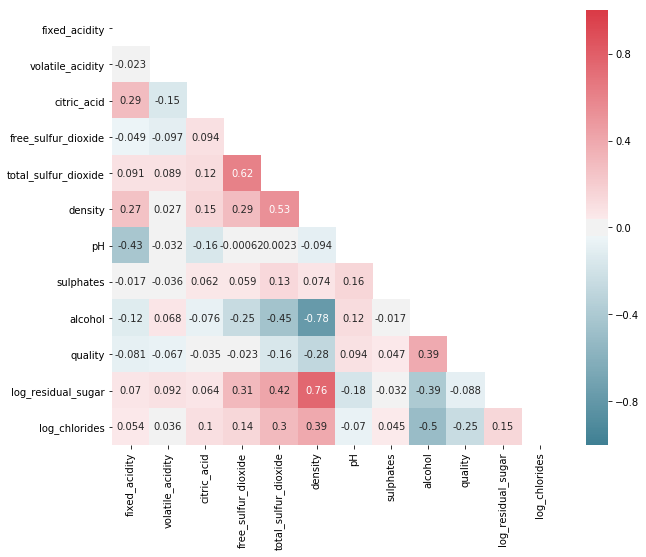

In [138]:
fig, ax = plt.subplots(figsize = [10,8])

corr = white_wine_binned.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Color Map
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, annot=True, ax = ax, vmin=-1, vmax=1, cmap=cmap, mask=mask)
plt.show()

In [137]:
white_wine_binned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed_acidity           4898 non-null float64
volatile_acidity        4898 non-null float64
citric_acid             4898 non-null float64
free_sulfur_dioxide     4898 non-null float64
total_sulfur_dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null float64
log_residual_sugar      4898 non-null float64
log_chlorides           4898 non-null float64
dtypes: float64(12)
memory usage: 459.3 KB


## FOCUS ON sulphate feature


# AUTOENCODERS: NON LINEAR GENERALIZATION OF PCA

In [30]:
import pylab as plt
import numpy as np
import seaborn as sns; sns.set()

import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
import tensorflow as tf 

from keras import regularizers

## TEST KERAS WITH MNIST

In [14]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 15s 1us/step


In [27]:
model = Sequential()
#input layer where input image is flattened 
model.add(Flatten())
# first hidden layer of 128 hidden neurons and relu activation
model.add(Dense(128, activation = tf.nn.relu ))
# second hidden layer of 128 hidden neurons and relu activation
model.add(Dense(128, activation = tf.nn.relu))
# output layer 
model.add(Dense(10, activation = tf.nn.softmax))

# define how we will learn 
model.compile(optimizer = 'adam', 
             loss='sparse_categorical_crossentropy' ,
              metrics = ['accuracy']
             )

# training our NN 
model.fit(x_train, y_train, epochs = 2 )

Epoch 1/2
60000/60000 [==============================] - 8s 141us/step - loss: 14.5201 - acc: 0.0991
Epoch 2/2
60000/60000 [==============================] - 6s 98us/step - loss: 14.5200 - acc: 0.0992


In [28]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print( val_loss, val_acc )

10000/10000 [==============================] - 0s 43us/step
14.491779391479492 0.1009


## TEST AUTOENCODER VS PCA FOR MNIST

In [30]:
# Reshape data and normalize 
x_train = x_train.reshape(-1, 784) / 255
x_test = x_test.reshape(-1, 784) / 255

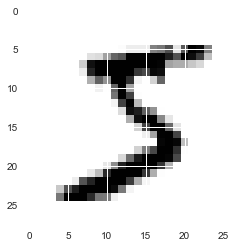

In [34]:
# plot first element of our training data
plt.imshow(x_train[0].reshape(28,28), cmap = plt.cm.binary)

## AUTOENCODER

### WITH MNIST 

In [124]:
m = Sequential()

#m.add(Flatten()) 

m.add(Dense(512,  activation='elu', input_shape=(784,)))  ## you can go like that or just add previous line with Flatten() and following

#m.add( Dense(512, activation='elu'))

m.add(Dense(128,  activation='elu'))

m.add(Dense(2,    activation='linear', name="bottleneck"))

m.add(Dense(128,  activation='elu'))

m.add(Dense(512,  activation='elu'))

m.add(Dense(784,  activation='sigmoid'))

m.compile(loss='mean_squared_error', 
          optimizer = Adam())

# training our CNN , verbose = 1 - progress bar 
history = m.fit(x_train, x_train, batch_size=128, epochs=5, verbose=1, 
                validation_data=(x_test, x_test))

encoder = Model(m.input, m.get_layer('bottleneck').output)
Zenc = encoder.predict(x_train)  # bottleneck representation
Renc = m.predict(x_train)        # reconstruction

ValueError: Error when checking input: expected dense_69_input to have shape (784,) but got array with shape (11,)

### With our data

In [14]:
white_wine_binned_ftures = white_wine_binned.drop('quality', axis = 1)

In [15]:
white_wine_binned_ftures.tail(5)

,fixed_acidity,volatile_acidity,citric_acid,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,log_residual_sugar,log_chlorides
4893,6.2,0.21,0.29,24.0,92.0,0.99114,3.27,0.50,11.2,0.470004,-3.244194
4894,6.6,0.32,0.36,57.0,168.0,0.99490,3.15,0.46,9.6,2.079442,-3.057608
4895,6.5,0.24,0.19,30.0,111.0,0.99254,2.99,0.46,9.4,0.182322,-3.194183
4896,5.5,0.29,0.30,20.0,110.0,0.98869,3.34,0.38,12.8,0.095310,-3.816713
4897,6.0,0.21,0.38,22.0,98.0,0.98941,3.26,0.32,11.8,-0.223144,-3.912023


In [16]:
def normalization(col, kind='mean'):
    if kind == 'mean':
        return (col-col.mean())/col.std()
    elif kind == 'min-max':
        return col/col.max()

In [17]:
# normalize data for better resuts on Autoencoder, otherwise we have some issues 
white_wine_normalized = white_wine_binned_ftures.apply(lambda col: normalization(col, kind='mean'), axis=0)

In [13]:
# mean and std are hence around 1 and 0 resp.
white_wine_normalized.loc[:,'chlorides'].std(), white_wine_normalized.loc[:,'chlorides'].mean()

(0.9999999999999942, -1.4190363869667885e-15)

In [15]:
white_wine_binned_ftures.values.shape

(4898, 11)

In [133]:
x_train = white_wine_normalized.values # shape (4898, 11)

nb_features = white_wine_normalized.columns.size 
size_input = nb_features # 11 features
size_output = size_input 

hidden1_size = 7  
bottleneck_size = 3
hidden3_size = hidden1_size


model = Sequential()

model.add(Dense(hidden1_size, activation = 'relu', input_shape = (size_input,)))

#model.add(Dense(hidden1_size,  activation='relu')) ## error-> strange behavior with only one dimension PCA

model.add(Dense(bottleneck_size, activation='linear', name = 'bottleneck'))  ## If I use activation=relu, one dimension PCA!!! All values of second component are null


model.add(Dense(hidden3_size,  activation='relu'))


model.add(Dense(size_output,  activation='sigmoid')) # sigmoid and softmax are equivalent for binary classification


model.compile(loss='mean_squared_error', 
          optimizer = Adam())

# training our CNN , verbose = 1 - progress bar, not enough data for validation set here
history = model.fit(x_train, x_train, batch_size=10, epochs=100, verbose=1 )

encoder = Model(model.input, model.get_layer('bottleneck').output)
Zenc = encoder.predict(x_train)  # bottleneck representation
Renc = model.predict(x_train)        # reconstruction


Epoch 1/100
4898/4898 [==============================] - 2s 370us/step - loss: 1.0424
Epoch 2/100
4898/4898 [==============================] - 1s 169us/step - loss: 0.8531
Epoch 3/100
4898/4898 [==============================] - 1s 170us/step - loss: 0.8028 1s 
Epoch 4/100
4898/4898 [==============================] - 1s 172us/step - loss: 0.7804
Epoch 5/100
4898/4898 [==============================] - 1s 167us/step - loss: 0.7682
Epoch 6/100
4898/4898 [==============================] - 1s 178us/step - loss: 0.7595
Epoch 7/100
4898/4898 [==============================] - 1s 165us/step - loss: 0.7529
Epoch 8/100
4898/4898 [==============================] - 1s 190us/step - loss: 0.7481
Epoch 9/100
4898/4898 [==============================] - 1s 247us/step - loss: 0.7444 0s - loss: 0.745
Epoch 10/100
4898/4898 [==============================] - 2s 314us/step - loss: 0.7417
Epoch 11/100
4898/4898 [==============================] - 1s 266us/step - loss: 0.7394
Epoch 12/100
4898/4898 [=======

4898/4898 [==============================] - 1s 147us/step - loss: 0.6736
Epoch 95/100
4898/4898 [==============================] - 1s 145us/step - loss: 0.6736
Epoch 96/100
4898/4898 [==============================] - 1s 165us/step - loss: 0.6733
Epoch 97/100
4898/4898 [==============================] - 1s 147us/step - loss: 0.6733
Epoch 98/100
4898/4898 [==============================] - 1s 147us/step - loss: 0.6729
Epoch 99/100
4898/4898 [==============================] - 1s 147us/step - loss: 0.6728
Epoch 100/100
4898/4898 [==============================] - 1s 170us/step - loss: 0.6730


In [96]:
Zenc.shape ## Shape is (4898, 2) so we have the representation of each original observation obtained with our autoencoder

(4898, 2)

In [134]:
new_df_white_wine = pd.DataFrame(Zenc, columns = ['feature1','feature2','feature3'])
new_df_white_wine.tail(5)

,feature1,feature2,feature3
4893,4.618351,0.993332,-2.169413
4894,8.093105,-1.823518,2.707321
4895,12.125544,8.429707,0.942749
4896,11.069630,-1.595804,-11.173173
4897,9.158737,1.803908,-5.317480


In [135]:
new_df_white_wine['quality'] = white_wine_binned['quality']
new_df_white_wine

,feature1,feature2,feature3,quality
0,11.700994,3.117927,5.011508,-1
1,3.296146,1.580328,-0.262531,-1
2,8.707504,8.440189,5.158263,-1
3,10.247211,1.916722,2.753643,-1
4,10.247211,1.916722,2.753643,-1
5,8.707504,8.440189,5.158263,-1
6,5.582290,2.860932,0.741199,-1
7,11.700994,3.117927,5.011508,-1
8,3.296146,1.580328,-0.262531,-1
9,8.492922,8.729502,4.316248,-1


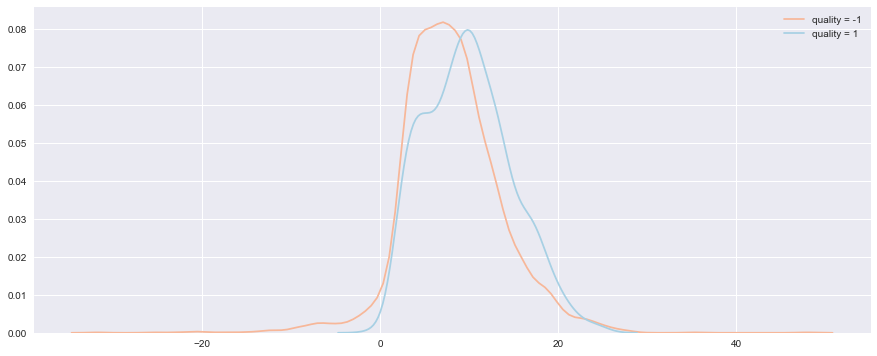

In [136]:
# print some distributions 

#################################
####### ADD LABEL COLUMN #########
#################################
new_df_white_wine['quality'] = white_wine_binned['quality']

#################################
####### PLOT p(feature1|class) #########
#################################
fig, ax = plt.subplots(figsize= [15,6])

palette = sns.color_palette("RdBu", n_colors=2)
labels = [-1, 1]

for i in range(2):
    sns.kdeplot(new_df_white_wine.loc[new_df_white_wine.quality == labels[i], 'feature1'], label = 'quality = '+str(labels[i]), ax = ax, color = palette[i])

#ax.set_xlim(left = 0)
plt.show()

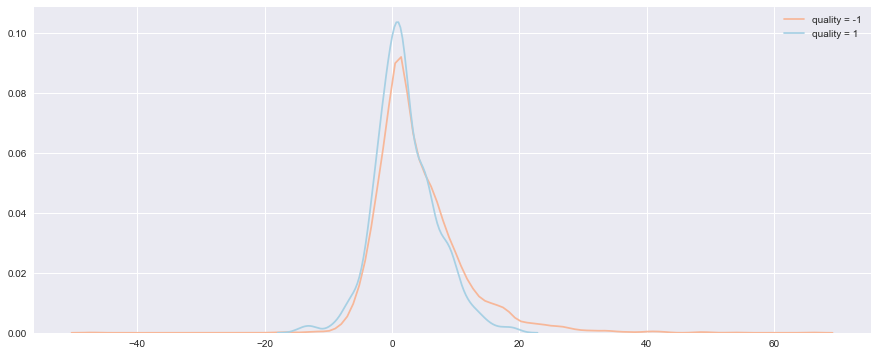

In [137]:
#################################
####### PLOT p(feature2|class) #########
#################################
fig, ax = plt.subplots(figsize= [15,6])

palette = sns.color_palette("RdBu", n_colors=2)
labels = [-1, 1]

for i in range(2):
    sns.kdeplot(new_df_white_wine.loc[new_df_white_wine.quality == labels[i], 'feature2'], label = 'quality = '+str(labels[i]), ax = ax, color = palette[i])

#ax.set_xlim(left = 0)
plt.show()

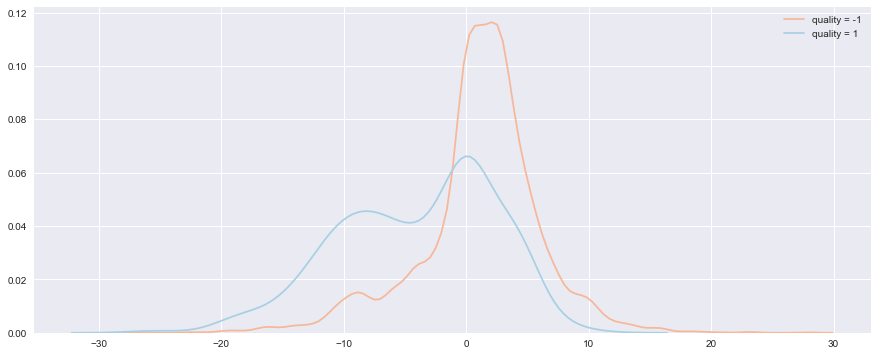

In [138]:
#################################
####### PLOT p(feature3|class) #########
#################################
fig, ax = plt.subplots(figsize= [15,6])

palette = sns.color_palette("RdBu", n_colors=2)
labels = [-1, 1]

for i in range(2):
    sns.kdeplot(new_df_white_wine.loc[new_df_white_wine.quality == labels[i], 'feature3'], label = 'quality = '+str(labels[i]), ax = ax, color = palette[i])

#ax.set_xlim(left = 0)
plt.show()

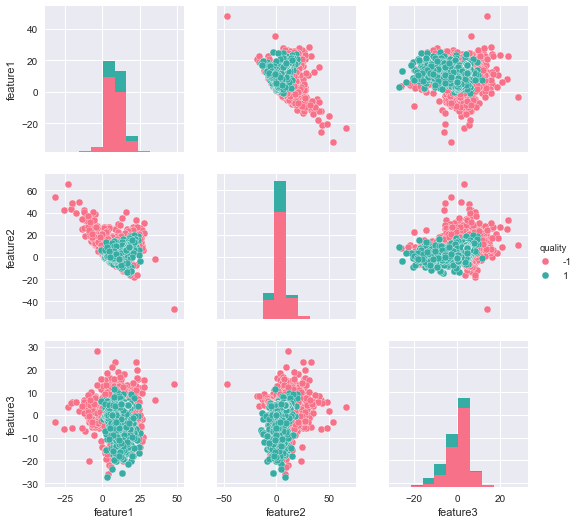

In [140]:
g = sns.pairplot(new_df_white_wine,vars=["feature1", "feature2", 'feature3'],  hue="quality", palette = 'husl')

In [ ]:
### Loss of 0.3 with 7 hidden layers 

In [23]:
# Growing our neural net and see effect on performance

x_train = white_wine_normalized.values # shape (4898, 11)

nb_features = white_wine_normalized.columns.size 
size_input = nb_features # 11 features

hidden0_size = 9 
hidden1_size =8  
hidden2_size = 5
bottleneck_size = 3
hidden4_size = 5 
hidden5_size = 8 
hidden6_size = 9

size_output = size_input 

model = Sequential()

model.add(Dense(hidden0_size, activation = 'relu', input_shape = (size_input,)))
# we add a sparsity constraint to force learning of most important feature s
model.add(Dense(hidden1_size, activation = 'relu', activity_regularizer=regularizers.l1(10e-5)))

model.add(Dense(hidden2_size, activation = 'relu'))


model.add(Dense(bottleneck_size, activation='linear', name = 'bottleneck'))  ## If I use activation=relu, one dimension PCA!!! All values of second component are null

model.add(Dense(hidden4_size,  activation='relu'))

model.add(Dense(hidden5_size,  activation='relu'))

model.add(Dense(hidden6_size, activation='relu', activity_regularizer=regularizers.l1(10e-5)))

model.add(Dense(size_output,  activation='linear')) # sigmoid and softmax are equivalent for binary classification


model.compile(loss='mean_squared_error', 
          optimizer = Adam())

# training our CNN , verbose = 1 - progress bar, not enough data for validation set here
history = model.fit( x_train, x_train, batch_size=5, epochs=100, verbose=0 )

encoder = Model(model.input, model.get_layer('bottleneck').output)
Zenc = encoder.predict(x_train)  # bottleneck representation
Renc = model.predict(x_train)        # reconstruction

In [28]:
print("Loss CV for 100 epochs to: {}".format(history.history['loss'][-1]))

Loss CV for 100 epochs to: 0.308043237206655


In [142]:
new_df_white_wine = pd.DataFrame(Zenc, columns = ['feature1','feature2','feature3'])
new_df_white_wine.tail(5)

,feature1,feature2,feature3
4893,-2.215398,-3.258978,7.138454
4894,-2.095452,-2.047359,2.265144
4895,-1.984159,-1.754978,3.512527
4896,-3.780215,-5.038905,11.403408
4897,-2.694873,-3.810095,9.062675


In [143]:
new_df_white_wine['quality'] = white_wine_binned['quality']
new_df_white_wine

,feature1,feature2,feature3,quality
0,-3.080422,-2.081455,2.000189,-1
1,-1.921165,-2.054273,3.292518,-1
2,-1.348093,-0.922607,1.804690,-1
3,-1.524717,-1.571326,1.689946,-1
4,-1.524717,-1.571326,1.689946,-1
5,-1.348093,-0.922607,1.804690,-1
6,-2.671881,-2.375701,3.336400,-1
7,-3.080422,-2.081455,2.000189,-1
8,-1.921165,-2.054273,3.292518,-1
9,-1.184831,-1.391029,3.403732,-1


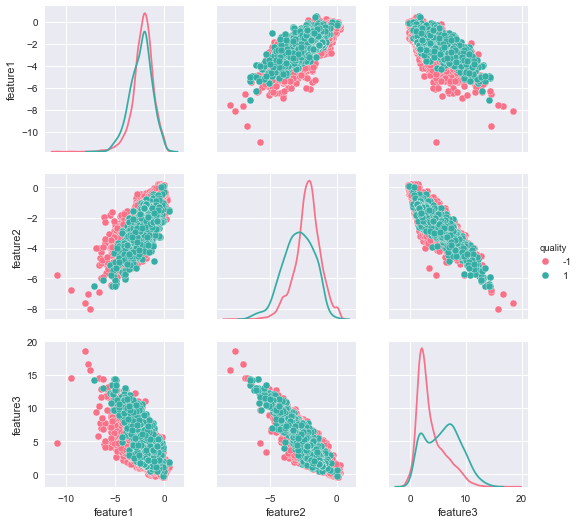

In [146]:
g = sns.pairplot(new_df_white_wine,vars=["feature1", "feature2", 'feature3'],  hue="quality", palette = 'husl', diag_kind='kde')

## VARIATIONAL AUTOENCODERS:

### MNIST

In [34]:
### FOLLOWING CODE from : https://github.com/keras-team/keras/blob/master/examples/variational_autoencoder.py

In [11]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [10]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from keras.layers import Lambda, Input, Dense
from keras.models import Model
from keras.datasets import mnist
from keras.losses import mse, binary_crossentropy
from keras.utils import plot_model
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt
import argparse
import os

In [30]:
# @TODO: reset with same seed like in Scalable!
tf.reset_default_graph()
import gc
K.clear_session()
gc.collect()


4014

In [31]:
batch_size=128
image_size = x_train.shape[1]
original_dim = image_size * image_size

(x_train, _), (x_test, _) = mnist.load_data()
image_size = x_train.shape[1]
original_dim = image_size * image_size
x_train = np.reshape(x_train, [-1, original_dim])
x_test = np.reshape(x_test, [-1, original_dim])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [32]:

# network parameters
input_shape = (original_dim, )
intermediate_dim = 512
batch_size = 96
latent_dim = 2
epochs = 50


# VAE model = encoder + decoder
# build encoder model
#inputs = Input(shape=input_shape, name='encoder_input')
#x = Dense(intermediate_dim, activation='relu')(inputs)
#z_mean = Dense(latent_dim, name='z_mean')(x)
#z_log_var = Dense(latent_dim, name='z_log_var')(x)

x = Input(batch_shape=(batch_size, original_dim))
h = Dense(intermediate_dim, activation='relu')(x)
z_mean = Dense(latent_dim)(h)
z_log_sigma = Dense(latent_dim)(h)


# reparameterization trick
# instead of sampling from Q(z|X), sample eps = N(0,I)
# z = z_mean + sqrt(var)*eps
def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(batch_size, latent_dim)) # by default mean=0, std=1
    return z_mean + K.exp(z_log_sigma) * epsilon



In [33]:
# use reparameterization trick to push the sampling out as input
# note that "output_shape" isn't necessary with the TensorFlow backend++
# Sample vector z from Gaussian distribution of mean z_mean and variance z_log_var

z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_sigma])

In [34]:
decoder_h = Dense(intermediate_dim, activation='relu')
decoder_mean = Dense(original_dim, activation='sigmoid') #ouput layer 
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

In [35]:
x_decoded_mean

<tf.Tensor 'dense_5/Sigmoid:0' shape=(96, 784) dtype=float32>

In [36]:
# end-to-end autoencoder
vae = Model(x, x_decoded_mean)
vae.summary()
#plot_model(vae, to_file='vae_mlp_total.png', show_shapes=True)

# encoder, from inputs to latent space
encoder = Model(x, z_mean)
encoder.summary()
#plot_model(encoder, to_file='vae_mlp_encoder.png', show_shapes=True)

# generator, from latent space to reconstructed inputs
decoder_input = Input(shape=(latent_dim,))
_h_decoded = decoder_h(decoder_input)
_x_decoded_mean = decoder_mean(_h_decoded)
generator = Model(decoder_input, _x_decoded_mean)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (96, 784)            0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (96, 512)            401920      input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (96, 2)              1026        dense_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (96, 2)              1026        dense_1[0][0]                    
__________________________________________________________________________________________________
z (Lambda)

In [37]:
def vae_loss(x, x_decoded_mean):
    xent_loss = binary_crossentropy(x, x_decoded_mean)
    kl_loss = - 0.5 * K.mean(1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma), axis=-1)
    return xent_loss + kl_loss

vae.compile(optimizer='rmsprop', loss=vae_loss)

#vae.compile(loss='mean_squared_error', 
#          optimizer = Adam())

In [38]:
224/2

112.0

In [39]:
# TRAIN OUR VAE ON MNIST DATA

epochs = 3 

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

vae.fit(x_train, x_train,
        shuffle=True,
        epochs=epochs,
        batch_size=batch_size
        ) 

Epoch 1/3
60000/60000 [==============================] - 21s 353us/step - loss: 0.2912
Epoch 2/3
60000/60000 [==============================] - 21s 355us/step - loss: 0.2632
Epoch 3/3
60000/60000 [==============================] - 21s 352us/step - loss: 0.2636


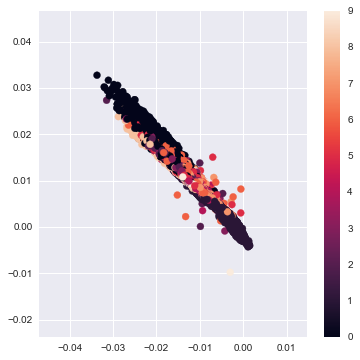

In [41]:
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.colorbar()
plt.show()

## WINE DATA -- VAE 

In [32]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from keras.layers import Lambda, Input, Dense
from keras.models import Model
from keras.datasets import mnist
from keras.losses import mse, binary_crossentropy
from keras.utils import plot_model
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt
import argparse
import os

In [76]:
# @TODO: reset with same seed like in Scalable!
tf.reset_default_graph()
import gc
K.clear_session()
gc.collect()


36415

In [77]:
white_wine_normalized.tail(5)

,fixed_acidity,volatile_acidity,citric_acid,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,log_residual_sugar,log_chlorides
4893,-0.775936,-0.677032,-0.365159,-0.664902,-1.090889,-0.965385,0.541278,0.088964,0.557225,-1.096750,-0.287362
4894,-0.301928,0.414297,0.213258,1.275460,0.697428,0.291759,-0.253420,-0.261526,-0.742932,0.649327,0.275951
4895,-0.420430,-0.379397,-1.191470,-0.312109,-0.643809,-0.497299,-1.313019,-0.261526,-0.905451,-1.408855,-0.136378
4896,-1.605449,0.116662,-0.282528,-0.900098,-0.667340,-1.784534,1.004853,-0.962507,1.857382,-1.503254,-2.015827
4897,-1.012940,-0.677032,0.378521,-0.782500,-0.949706,-1.543805,0.475053,-1.488242,1.044784,-1.848744,-2.303574


In [78]:
white_wine_normalized.columns.shape

(11,)

In [79]:
# network parameters
batch_size = 1
original_dim = 11 # nb of features 
input_shape = white_wine_normalized.columns.shape # (11,)
intermediate_dim1 = 8
intermediate_dim2 = 5
latent_dim = 2
epochs = 50

###########################
######### MODEL ###########
##########################

x = Input(batch_shape=(batch_size, original_dim))
h = Dense(intermediate_dim, activation='relu')(x)
z_mean = Dense(latent_dim)(h)
z_log_sigma = Dense(latent_dim)(h)


# reparameterization trick
# instead of sampling from Q(z|X), sample eps = N(0,I)
# z = z_mean + sqrt(var)*eps
def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(batch_size, latent_dim)) # by default mean=0, std=1
    return z_mean + K.exp(z_log_sigma) * epsilon

# use reparameterization trick to push the sampling out as input
# note that "output_shape" isn't necessary with the TensorFlow backend++
# Sample vector z from Gaussian distribution of mean z_mean and variance z_log_var
z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_sigma])

# decoding layer 
decoder_h = Dense(intermediate_dim, activation='relu') # intermediate layer after coding layer 
decoder_mean = Dense(original_dim, activation='sigmoid') # ouput layer 
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

# end-to-end autoencoder
vae = Model(x, x_decoded_mean)
vae.summary()
#plot_model(vae, to_file='vae_mlp_total.png', show_shapes=True)

# encoder, from inputs to latent space
encoder = Model(x, z_mean) ## z_mean OR z here? 
encoder.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (1, 11)              0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (1, 6)               72          input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (1, 2)               14          dense_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (1, 2)               14          dense_1[0][0]                    
__________________________________________________________________________________________________
z (Lambda)

In [86]:
def vae_loss(x, x_decoded_mean):
    xent_loss = binary_crossentropy(x, x_decoded_mean)
    kl_loss = - 0.5 * K.mean(1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma), axis=-1)
    return xent_loss + kl_loss

def mse_loss(x, x_decoded_mean):
    return mse(x,x_decoded_mean)

vae.compile(optimizer='rmsprop', loss=vae_loss)
#vae.compile(loss='mean_squared_error', 
#          optimizer = Adam())

In [87]:
x_train = white_wine_normalized.values

In [88]:
x_train[0].shape

(11,)

In [91]:
# TRAIN OUR VAE ON WINE DATA

epochs = 5
vae.fit(x_train, x_train,
        shuffle=True,
        epochs=epochs,
        batch_size=batch_size
        )  

Epoch 1/5
4898/4898 [==============================] - 6s 1ms/step - loss: -1.9425
Epoch 2/5
4898/4898 [==============================] - 6s 1ms/step - loss: 3.2024
Epoch 3/5
4898/4898 [==============================] - 6s 1ms/step - loss: -0.3833
Epoch 4/5
4898/4898 [==============================] - 6s 1ms/step - loss: 0.7971
Epoch 5/5
4898/4898 [==============================] - 6s 1ms/step - loss: -1.5318


In [99]:
#encoder = Model(model.input, model.get_layer('z').output)
encodings = encoder.predict(x_train)  # bottleneck representation
reconstr = vae.predict(x_train) # reconstructed input 

In [110]:
loss = tf.reduce_mean(tf.squared_difference(reconstr, x_train))
sess = tf.Session()
print(sess.run(loss))
sess.close()

0.78516424


### VAE with 5 hidden layers 

In [196]:
# @TODO: reset with same seed like in Scalable!
tf.reset_default_graph()
import gc
K.clear_session()
gc.collect()


15427

In [120]:
# network parameters
batch_size = 1
original_dim = 11 # nb of features 
input_shape = white_wine_normalized.columns.shape # (11,)
intermediate_dim1 = 8
intermediate_dim2 = 5
latent_dim = 2
epochs = 50

###########################
######### MODEL ###########
##########################

x = Input(batch_shape=(batch_size, original_dim))
h1 = Dense(intermediate_dim1, activation='relu')(x)
h2 = Dense(intermediate_dim2, activation='relu')(h1)

z_mean = Dense(latent_dim)(h2)
z_log_sigma = Dense(latent_dim)(h2)

# reparameterization trick
# instead of sampling from Q(z|X), sample eps = N(0,I)
# z = z_mean + sqrt(var)*eps
def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(batch_size, latent_dim)) # by default mean=0, std=1
    return z_mean + K.exp(z_log_sigma) * epsilon

# use reparameterization trick to push the sampling out as input
# note that "output_shape" isn't necessary with the TensorFlow backend++
# Sample vector z from Gaussian distribution of mean z_mean and variance z_log_var
z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_sigma])

# decoding layer
decoder_h1 = Dense(intermediate_dim1, activation='relu')
decoder_h2 = Dense(intermediate_dim2, activation='relu') 
decoder_mean = Dense(original_dim, activation='sigmoid') # ouput layer 

h_decoded1 = decoder_h1(z)
h_decoded2 = decoder_h2(h_decoded1)
x_decoded_mean = decoder_mean(h_decoded2)

# end-to-end autoencoder
vae = Model(x, x_decoded_mean)
vae.summary()
#plot_model(vae, to_file='vae_mlp_total.png', show_shapes=True)

# encoder, from inputs to latent space
encoder = Model(x, z) ## z_mean OR z here? 
encoder.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (1, 11)              0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (1, 8)               96          input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (1, 5)               45          dense_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (1, 2)               12          dense_2[0][0]                    
__________________________________________________________________________________________________
dense_4 (D

In [121]:
def vae_loss(x, x_decoded_mean):
    xent_loss = binary_crossentropy(x, x_decoded_mean)
    kl_loss = - 0.5 * K.mean(1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma), axis=-1)
    return xent_loss + kl_loss

def mse_loss(x, x_decoded_mean):
    return mse(x,x_decoded_mean)

vae.compile(optimizer='rmsprop', loss=vae_loss)
#vae.compile(loss='mean_squared_error', 
#          optimizer = Adam())

In [122]:
# TRAIN OUR VAE ON WINE DATA

epochs = 5
vae.fit(x_train, x_train,
        shuffle=True,
        epochs=epochs,
        batch_size=batch_size
        )  

Epoch 1/5
4898/4898 [==============================] - 7s 1ms/step - loss: -0.2671
Epoch 2/5
4898/4898 [==============================] - 8s 2ms/step - loss: -1.4442
Epoch 3/5
4898/4898 [==============================] - 6s 1ms/step - loss: -1.8865
Epoch 4/5
4898/4898 [==============================] - 7s 1ms/step - loss: -2.0336
Epoch 5/5
4898/4898 [==============================] - 7s 1ms/step - loss: -2.0553


In [117]:
#encoder = Model(model.input, model.get_layer('z').output)
encodings = encoder.predict(x_train)  # bottleneck representation
reconstr = vae.predict(x_train) # reconstructed input

In [118]:
loss = tf.reduce_mean(tf.squared_difference(reconstr, x_train))
sess = tf.Session()
print(sess.run(loss))
sess.close()

0.8706277


## PCA

In [39]:
mu = x_train.mean(axis=0)
U,s,V = np.linalg.svd(x_train - mu, full_matrices=False)
Zpca = np.dot(x_train - mu, V.transpose())

Rpca = np.dot(Zpca[:,:2], V[:2,:]) + mu    # reconstructionq
err = np.sum((x_train-Rpca)**2)/Rpca.shape[0]/Rpca.shape[1]
print('PCA reconstruction error with 2 PCs: ' + str(round(err,3)))

PCA reconstruction error with 2 PCs: 0.056


# Classification with Random Forest  -- original data 

In [116]:
import pylab as plt
import numpy as np
import seaborn as sns; sns.set()

import time

import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
import tensorflow as tf 

from keras import regularizers

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score


In [26]:
X = white_wine_normalized  # Work with logs of 2 features and normalized overall data 
Y = white_wine_binned['quality']


In [20]:
# Split data into training and testing 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42) 

In [21]:
rf = RandomForestClassifier(n_estimators=200, max_depth=10)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)

In [22]:
roc_auc_score(y_test, predictions)

0.7633460285144298

### Data reduction with Stacked autoencoders 

In [184]:
# @TODO: reset with same seed like in Scalable!
tf.reset_default_graph()
import gc
K.clear_session()
gc.collect()


15356

In [185]:
### Data split 
# Split data into training and testing 
X = white_wine_normalized.values
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42) 

In [186]:
# Growing our neural net and see effect on performance


nb_features = white_wine_normalized.columns.size 
size_input = nb_features # 11 features

hidden0_size = 9 
hidden1_size =8  
hidden2_size = 6
bottleneck_size = 5
hidden4_size = 6 
hidden5_size = 8 
hidden6_size = 9

size_output = size_input 

model = Sequential()

model.add(Dense(hidden0_size, activation = 'relu', input_shape = (size_input,)))
# we add a sparsity constraint to force learning of most important feature s
model.add(Dense(hidden1_size, activation = 'relu', activity_regularizer=regularizers.l1(10e-5)))

model.add(Dense(hidden2_size, activation = 'relu'))


model.add(Dense(bottleneck_size, activation='relu', name = 'bottleneck'))  ## If I use activation=relu, one dimension PCA!!! All values of second component are null

model.add(Dense(hidden4_size,  activation='relu'))

model.add(Dense(hidden5_size,  activation='relu'))

model.add(Dense(hidden6_size, activation='relu', activity_regularizer=regularizers.l1(10e-5)))

model.add(Dense(size_output,  activation='sigmoid')) # sigmoid and softmax are equivalent for binary classification

t0 = time.time()

model.compile(loss='mean_squared_error', 
          optimizer = Adam())

# training our CNN , verbose = 1 - progress bar, not enough data for validation set here
history = model.fit( x_train, x_train, batch_size=5, epochs=200, verbose=0 )

t1 = time.time()

time_stacked_autoencoder = t1 - t0 
print('Training time: {}'.format(time_stacked_autoencoder))

encoder = Model(model.input, model.get_layer('bottleneck').output)
encodings = encoder.predict(x_train)  # bottleneck representation
reconstruction = model.predict(x_train)        # reconstruction

Training time: 214.46498084068298


In [187]:
new_df_white_wine = pd.DataFrame(encodings, columns = ['feature1','feature2','feature3'])
new_df_white_wine.tail(5)

,feature1,feature2,feature3
4893,0.340336,0.479578,2.389510
4894,1.628760,0.626397,1.330104
4895,0.714315,0.429013,1.966417
4896,0.000000,0.652979,3.098951
4897,0.160049,0.447908,2.562431


In [188]:
X_new = new_df_white_wine

In [189]:
x_test.shape

(980, 11)

### Classification with projected data -- AUTOENCODERS

In [190]:
# Split data into training and testing 
#x_train, x_test, y_train, y_test = train_test_split(X_new, Y, test_size = 0.2, random_state = 42) 

In [191]:
## FIT THE PROJECTED DATA 

rf = RandomForestClassifier(n_estimators=200, max_depth=10)
rf.fit(encodings, y_train)

x_test = encoder.predict(x_test)
predictions = rf.predict(x_test)

In [192]:
auc_deep_auto = roc_auc_score(y_test, predictions)
auc_deep_auto

0.6512218380516116

### Data reduction with Variational autoencoders 

In [217]:
### Data split 
# Split data into training and testing 
X = white_wine_normalized.values
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42) 

In [218]:
# @TODO: reset with same seed like in Scalable!
tf.reset_default_graph()
import gc
K.clear_session()
gc.collect()


Exception ignored in: <bound method ScopedTFStatus.__del__ of <tensorflow.python.framework.c_api_util.ScopedTFStatus object at 0x000001B90D6B6898>>
Traceback (most recent call last):
  File "C:\Users\Mous\Programmes\Anaconda\lib\site-packages\tensorflow\python\framework\c_api_util.py", line 39, in __del__
    c_api.TF_DeleteStatus(self.status)
AttributeError: 'ScopedTFStatus' object has no attribute 'status'


43629

In [220]:
# network parameters
batch_size = 1
original_dim = 11 # nb of features 
input_shape = white_wine_normalized.columns.shape # (11,)
intermediate_dim1 = 9
intermediate_dim2 = 7
latent_dim = 5 # dimension of encodings 
epochs = 50

###########################
######### MODEL ###########
##########################

x = Input(batch_shape=(batch_size, original_dim))
h1 = Dense(intermediate_dim1, activation='relu')(x)
h2 = Dense(intermediate_dim2, activation='relu')(h1)

z_mean = Dense(latent_dim)(h2)
z_log_sigma = Dense(latent_dim)(h2)

# reparameterization trick
# instead of sampling from Q(z|X), sample eps = N(0,I)
# z = z_mean + sqrt(var)*eps
def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(batch_size, latent_dim)) # by default mean=0, std=1
    return z_mean + K.exp(z_log_sigma) * epsilon

# use reparameterization trick to push the sampling out as input
# note that "output_shape" isn't necessary with the TensorFlow backend++
# Sample vector z from Gaussian distribution of mean z_mean and variance z_log_var
z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_sigma])

# decoding layer
decoder_h1 = Dense(intermediate_dim1, activation='relu')
decoder_h2 = Dense(intermediate_dim2, activation='relu') 
decoder_mean = Dense(original_dim, activation='sigmoid') # ouput layer 

h_decoded1 = decoder_h1(z)
h_decoded2 = decoder_h2(h_decoded1)
x_decoded_mean = decoder_mean(h_decoded2)

# end-to-end autoencoder
vae = Model(x, x_decoded_mean)
vae.summary()
#plot_model(vae, to_file='vae_mlp_total.png', show_shapes=True)

# encoder, from inputs to latent space
encoder = Model(x, z_mean) ## z_mean OR z here? 
encoder.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (1, 11)              0                                            
__________________________________________________________________________________________________
dense_8 (Dense)                 (1, 9)               108         input_2[0][0]                    
__________________________________________________________________________________________________
dense_9 (Dense)                 (1, 7)               70          dense_8[0][0]                    
__________________________________________________________________________________________________
dense_10 (Dense)                (1, 5)               40          dense_9[0][0]                    
__________________________________________________________________________________________________
dense_11 (

In [221]:
def vae_loss(x, x_decoded_mean):
    xent_loss = binary_crossentropy(x, x_decoded_mean)
    kl_loss = - 0.5 * K.mean(1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma), axis=-1)
    return xent_loss + kl_loss

def mse_loss(x, x_decoded_mean):
    return mse(x,x_decoded_mean)

vae.compile(optimizer='rmsprop', loss=vae_loss)
#vae.compile(loss='mean_squared_error', 
#          optimizer = Adam())

### train on part of the data 

In [222]:
# TRAIN OUR VAE ON WINE DATA

epochs = 50
t0 = time.time()

vae.fit(x_train, x_train,
        shuffle=True,
        epochs=epochs,
        batch_size=batch_size
        )  

t1 = time.time()
time_vae = t1 - t0 
print('Training time: {}'.format(time_vae))

Epoch 1/50
3918/3918 [==============================] - 7s 2ms/step - loss: -0.8599: 0s
Epoch 2/50
3918/3918 [==============================] - 6s 2ms/step - loss: -2.4667
Epoch 3/50
3918/3918 [==============================] - 5s 1ms/step - loss: -2.7094
Epoch 4/50
3918/3918 [==============================] - 5s 1ms/step - loss: -2.8782
Epoch 5/50
3918/3918 [==============================] - 6s 1ms/step - loss: -3.0917
Epoch 6/50
3918/3918 [==============================] - 6s 2ms/step - loss: -3.3041
Epoch 7/50
3918/3918 [==============================] - 7s 2ms/step - loss: -3.4595
Epoch 8/50
3918/3918 [==============================] - 7s 2ms/step - loss: -3.5636
Epoch 9/50
3918/3918 [==============================] - 7s 2ms/step - loss: -3.6377
Epoch 10/50
3918/3918 [==============================] - 5s 1ms/step - loss: -3.6964
Epoch 11/50
3918/3918 [==============================] - 5s 1ms/step - loss: -3.7331
Epoch 12/50
3918/3918 [==============================] - 5s 1ms/step -

In [225]:
#encoder = Model(model.input, model.get_layer('z').output)
encodings = encoder.predict(x_train)  # bottleneck representation
reconstr = vae.predict(x_train) # reconstructed input

In [226]:
loss = tf.reduce_mean(tf.squared_difference(reconstr, x_train))
sess = tf.Session()
print(sess.run(loss))
sess.close()

0.7642885


In [227]:
x_test_proj.shape

(980, 5)

### Classification with VAE 

In [228]:
## Train random forest on project training data + project test data and predict 
rf = RandomForestClassifier(n_estimators=200, max_depth=10)
rf.fit(encodings, y_train)

######################################
##### project test data + predict ##########
#######################################
x_test_proj = encoder.predict(x_test)
predictions = rf.predict(x_test_proj)


##########################################
########### Measure performance: AUC ##########
##########################################
roc_score_vae = roc_auc_score(y_test, predictions)
print(roc_score_vae)

0.6888773832716125


In [ ]:
from sklearn.metrics import average_precision_score
average_precision_vae = average_precision_score(y_test, y_score)

### Data reduction with PCA

In [177]:
### Data split 
# Split data into training and testing 
X = white_wine_normalized.values
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42) 

In [74]:
def pca(dataMat, topNfeat=np.inf):
    
    t0 = time.time()


    meanVals = np.mean(dataMat, axis=0)
    meanRemoved = dataMat - meanVals


    covmat = np.cov(meanRemoved, rowvar=0)
    #print(covmat)
    
    
    eigVals, eigVects = np.linalg.eig(np.mat(covmat))
    eigValInd = np.argsort(eigVals)
    eigValInd = eigValInd[:-(topNfeat+1):-1]    
    redEigVects = eigVects[:, eigValInd]        

   
    lowDDataMat = meanRemoved * redEigVects     
    reconMat = (lowDDataMat * redEigVects.T) + meanVals 
    
    t1 = time.time()
    time_pca = t1 - t0
    return np.array(lowDDataMat), np.array(reconMat), time_pca

In [179]:
project_data, recons_data, time_pca = pca(x_train, topNfeat = 5)  ## project data with top N features and reconstructed data from those features 

In [180]:
project_data.shape

(3918, 5)

In [181]:
rf = RandomForestClassifier(n_estimators=200, max_depth=10)
rf.fit(project_data, y_train)

x_test_proj, _, _ = pca(x_test, topNfeat = 5)
predictions = rf.predict(x_test_proj)

In [182]:
auc_pca = roc_auc_score(y_test, predictions)
print(auc_pca)

0.46782034856170035


### SUMMARY OF COMPARISON BETWEEN 3 data reduction techniques -- WHITE WINE DATA 

In [229]:
compare_table = {'Deep Auto': [time_stacked_autoencoder, auc_deep_auto], 'VAE': [time_vae, roc_score_vae], 'PCA':[time_pca, auc_pca] }

compare_df = pd.DataFrame.from_dict(compare_table)
compare_df.index = ['Training time', 'AUC Score']
compare_df

,Deep Auto,VAE,PCA
Training time,214.464981,283.329450,0.003005
AUC Score,0.651222,0.688877,0.467820


### QUICK COMPARISON OF DISTRIBUTIONS OF RED WINE AND WHITE WINE 

We will show that the two datasets are not representing the same objects by analyzing the distributions of some features. A 2D vizualization is indeed the best way to easily compare the two datasets. 

In [77]:
wine_df_red.tail(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [78]:
wine_df_white.tail(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [81]:
## Simple approach : Binary classification 

bins = (2, 6.5, 10)
labels = [-1, 1]

red_wine_binned = wine_df_red.copy( deep = True )
red_wine_binned['quality'] = pd.cut(red_wine_binned['quality'], bins = bins, labels = labels)

white_wine_binned = wine_df_white.copy( deep = True )
white_wine_binned['quality'] = pd.cut(white_wine_binned['quality'], bins = bins, labels = labels)

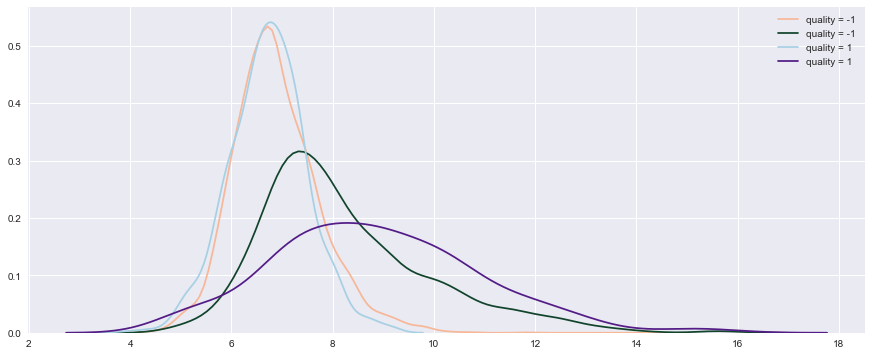

In [89]:
#################################
####### PLOT p(feature1|class) for both distributions RED and WHITE #########
#################################
fig, ax = plt.subplots(figsize= [15,6])

palette = sns.color_palette("RdBu", n_colors=2)
palette_red = sns.diverging_palette(145, 280, s=85, l=25, n=2)
labels = [-1, 1]

for i in range(2):
    sns.kdeplot(white_wine_binned.loc[white_wine_binned.quality == labels[i], 'fixed_acidity'], label = 'quality = '+str(labels[i]), ax = ax, color = palette[i])
    sns.kdeplot(red_wine_binned.loc[red_wine_binned.quality == labels[i], 'fixed_acidity'], label = 'quality = '+str(labels[i]), ax = ax, color = palette_red[i])
#ax.set_xlim(left = 0)
plt.show()

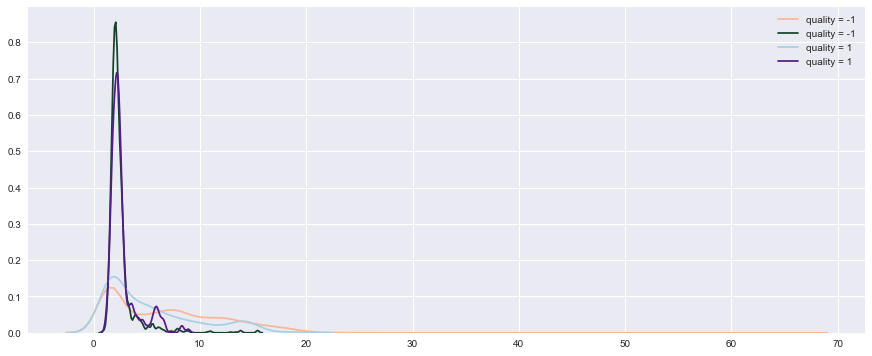

In [90]:
#################################
####### PLOT p(feature1|class) for both distributions RED and WHITE #########
#################################
fig, ax = plt.subplots(figsize= [15,6])

palette = sns.color_palette("RdBu", n_colors=2)
palette_red = sns.diverging_palette(145, 280, s=85, l=25, n=2)
labels = [-1, 1]

for i in range(2):
    sns.kdeplot(white_wine_binned.loc[white_wine_binned.quality == labels[i], 'residual_sugar'], label = 'quality = '+str(labels[i]), ax = ax, color = palette[i])
    sns.kdeplot(red_wine_binned.loc[red_wine_binned.quality == labels[i], 'residual_sugar'], label = 'quality = '+str(labels[i]), ax = ax, color = palette_red[i])
#ax.set_xlim(left = 0)
plt.show()

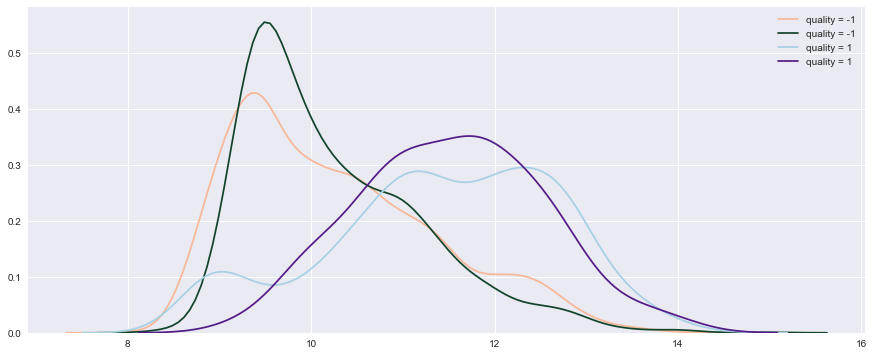

In [91]:
#################################
####### PLOT p(feature1|class) for both distributions RED and WHITE #########
#################################
fig, ax = plt.subplots(figsize= [15,6])

palette = sns.color_palette("RdBu", n_colors=2)
palette_red = sns.diverging_palette(145, 280, s=85, l=25, n=2)
labels = [-1, 1]

for i in range(2):
    sns.kdeplot(white_wine_binned.loc[white_wine_binned.quality == labels[i], 'alcohol'], label = 'quality = '+str(labels[i]), ax = ax, color = palette[i])
    sns.kdeplot(red_wine_binned.loc[red_wine_binned.quality == labels[i], 'alcohol'], label = 'quality = '+str(labels[i]), ax = ax, color = palette_red[i])
#ax.set_xlim(left = 0)
plt.show()

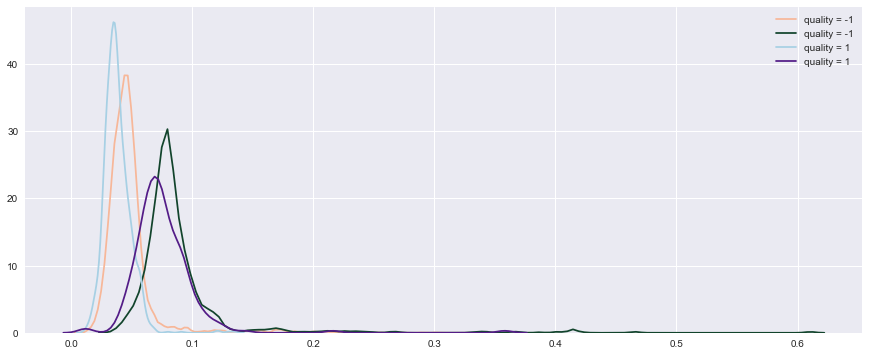

In [92]:
#################################
####### PLOT p(feature1|class) for both distributions RED and WHITE #########
#################################
fig, ax = plt.subplots(figsize= [15,6])

palette = sns.color_palette("RdBu", n_colors=2)
palette_red = sns.diverging_palette(145, 280, s=85, l=25, n=2)
labels = [-1, 1]

for i in range(2):
    sns.kdeplot(white_wine_binned.loc[white_wine_binned.quality == labels[i], 'chlorides'], label = 'quality = '+str(labels[i]), ax = ax, color = palette[i])
    sns.kdeplot(red_wine_binned.loc[red_wine_binned.quality == labels[i], 'chlorides'], label = 'quality = '+str(labels[i]), ax = ax, color = palette_red[i])
#ax.set_xlim(left = 0)
plt.show()

# DATA REDUCTION AND CLASSIFICATION -- RED WINE -- 

In [33]:
wine_df_red.tail(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [6]:
wine_df_red.shape

(1599, 12)

## Correlation matrix 

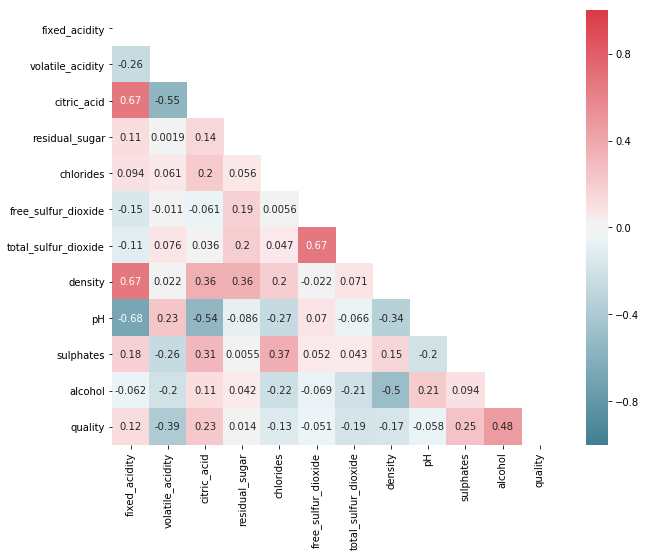

In [5]:
fig, ax = plt.subplots(figsize = [10,8])

corr = wine_df_red.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Color Map
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr,annot=True, ax = ax, vmin=-1, vmax=1, cmap=cmap, mask=mask)
plt.show()

We have some features like pH and residual sugar that presents a very low correlation coefficient. As a result, it might be interesting to apply data reduction. Further, we compare again some techniques of data reduction. 

C:\Users\Mous\Programmes\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


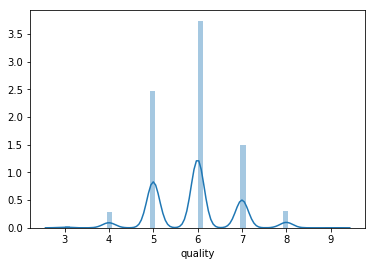

In [7]:
sns.distplot( wine_df_white['quality'] )

In [46]:
######### PROCESSING OF DATA ############
#########################################

############ BINARY CLASSIFICATION #########
############################################

bins = (2, 6.5, 10)
labels = [-1, 1]

red_wine_binned = wine_df_red.copy( deep = True )
red_wine_binned['quality'] = pd.cut(red_wine_binned['quality'], bins = bins, labels = labels)


###########################################
############# NORMALIZATION ###############
###########################################

def normalization(col, kind='mean'):
    if kind == 'mean':
        return (col-col.mean())/col.std()
    elif kind == 'min-max':
        return col/col.max()
    
red_wine_features = red_wine_binned.drop('quality', axis = 1 )
red_wine_norm = red_wine_features.apply( lambda col: normalization(col, 'mean'), axis = 0 )

## STACKED AUTOENCODERS 

In [79]:
# @TODO: reset with same seed like in Scalable!
tf.reset_default_graph()
import gc
K.clear_session()
gc.collect()


4482

In [87]:
### Data split 
# Split data into training and testing 
X = red_wine_norm.values
Y = red_wine_binned['quality']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42) 

In [88]:
# Growing our neural net and see effect on performance


nb_features = red_wine_norm.columns.size 
size_input = nb_features # 11 features

hidden0_size = 9 
hidden1_size =8  
hidden2_size = 6
bottleneck_size = 5 # Projection in 5 dimension space 
hidden4_size = 6 
hidden5_size = 8 
hidden6_size = 9

size_output = size_input 

model = Sequential()

model.add(Dense(hidden0_size, activation = 'relu', input_shape = (size_input,)))
# we add a sparsity constraint to force learning of most important feature s
model.add(Dense(hidden1_size, activation = 'relu', activity_regularizer=regularizers.l1(10e-5)))

model.add(Dense(hidden2_size, activation = 'relu'))


model.add(Dense(bottleneck_size, activation='relu', name = 'bottleneck'))  ## If I use activation=relu, one dimension PCA!!! All values of second component are null

model.add(Dense(hidden4_size,  activation='relu'))

model.add(Dense(hidden5_size,  activation='relu'))

model.add(Dense(hidden6_size, activation='relu', activity_regularizer=regularizers.l1(10e-5)))

model.add(Dense(size_output,  activation='sigmoid')) # sigmoid and softmax are equivalent for binary classification

t0 = time.time()

model.compile(loss='mean_squared_error', 
          optimizer = Adam())

# training our CNN , verbose = 1 - progress bar, not enough data for validation set here
history = model.fit( x_train, x_train, batch_size=5, epochs=200, verbose=0 )

t1 = time.time()

time_stacked_autoencoder = t1 - t0 
print('Training time: {}'.format(time_stacked_autoencoder))

encoder = Model(model.input, model.get_layer('bottleneck').output)
encodings = encoder.predict(x_train)  # bottleneck representation
reconstruction = model.predict(x_train)        # reconstruction

Training time: 63.20646524429321


In [89]:
feature_names = ['f'+str(i) for i in range(bottleneck_size)]

red_wine_new = pd.DataFrame( encodings, columns = feature_names )
red_wine_new.tail(5)

,f0,f1,f2,f3,f4
1274,0.874921,4.524252,1.611188,4.262405,0.0
1275,0.480769,3.688347,0.302517,3.521153,0.0
1276,0.832348,4.696468,0.698277,5.464827,0.0
1277,0.143368,4.551069,1.235167,2.486226,0.0
1278,0.061717,10.068909,3.068694,5.254462,0.0


In [90]:
x_test.shape

(320, 11)

In [91]:
# FIT THE PROJECTED DATA 

rf = RandomForestClassifier(n_estimators=200, max_depth=10)
rf.fit(encodings, y_train)

x_test = encoder.predict(x_test)
predictions = rf.predict(x_test)

### YOU CAN ADD ANY OTHER METRICS HERE 

In [96]:
##########################################
########### Measure performance: AUC ##########
##########################################
roc_score_sae = roc_auc_score(y_test, predictions)
print(roc_score_sae)

0.6537292494739304


# VAE 

In [65]:
### Data split 
# Split data into training and testing 
X = red_wine_norm.values
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42) 

In [66]:

tf.reset_default_graph()
import gc
K.clear_session()
gc.collect()


105

In [67]:
# network parameters
batch_size = 1
original_dim = 11 # nb of features 
input_shape = red_wine_norm.columns.shape # (11,)
intermediate_dim1 = 9
intermediate_dim2 = 7
latent_dim = 5 # dimension of encodings 
epochs = 50

###########################
######### MODEL ###########
##########################

x = Input(batch_shape=(batch_size, original_dim))
h1 = Dense(intermediate_dim1, activation='relu')(x)
h2 = Dense(intermediate_dim2, activation='relu')(h1)

z_mean = Dense(latent_dim)(h2)
z_log_sigma = Dense(latent_dim)(h2)

# reparameterization trick
# instead of sampling from Q(z|X), sample eps = N(0,I)
# z = z_mean + sqrt(var)*eps
def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(batch_size, latent_dim)) # by default mean=0, std=1
    return z_mean + K.exp(z_log_sigma) * epsilon

# use reparameterization trick to push the sampling out as input
# note that "output_shape" isn't necessary with the TensorFlow backend++
# Sample vector z from Gaussian distribution of mean z_mean and variance z_log_var
z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_sigma])

# decoding layer
decoder_h1 = Dense(intermediate_dim1, activation='relu')
decoder_h2 = Dense(intermediate_dim2, activation='relu') 
decoder_mean = Dense(original_dim, activation='sigmoid') # ouput layer 

h_decoded1 = decoder_h1(z)
h_decoded2 = decoder_h2(h_decoded1)
x_decoded_mean = decoder_mean(h_decoded2)

# end-to-end autoencoder
vae = Model(x, x_decoded_mean)
vae.summary()
#plot_model(vae, to_file='vae_mlp_total.png', show_shapes=True)

# encoder, from inputs to latent space
encoder = Model(x, z_mean) 
encoder.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (1, 11)              0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (1, 9)               108         input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (1, 7)               70          dense_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (1, 5)               40          dense_2[0][0]                    
__________________________________________________________________________________________________
dense_4 (D

In [68]:
def vae_loss(x, x_decoded_mean):
    xent_loss = binary_crossentropy(x, x_decoded_mean)
    kl_loss = - 0.5 * K.mean(1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma), axis=-1)
    return xent_loss + kl_loss

def mse_loss(x, x_decoded_mean):
    return mse(x,x_decoded_mean)

vae.compile(optimizer='rmsprop', loss=vae_loss)
#vae.compile(loss='mean_squared_error', 
#          optimizer = Adam())

In [69]:
######### TRAIN OUR VAE ON WINE DATA ##########
###############################################

epochs = 50
t0 = time.time()

vae.fit(x_train, x_train,
        shuffle=True,
        epochs=epochs,
        batch_size=batch_size
        )  

t1 = time.time()
time_vae = t1 - t0 
print('Training time: {}'.format(time_vae))

Epoch 1/50
1279/1279 [==============================] - 3s 2ms/step - loss: 0.4653
Epoch 2/50
1279/1279 [==============================] - 2s 1ms/step - loss: -0.3072
Epoch 3/50
1279/1279 [==============================] - 2s 1ms/step - loss: -1.2158
Epoch 4/50
1279/1279 [==============================] - 2s 1ms/step - loss: -1.5129
Epoch 5/50
1279/1279 [==============================] - 2s 1ms/step - loss: -1.6596
Epoch 6/50
1279/1279 [==============================] - 2s 1ms/step - loss: -1.7445
Epoch 7/50
1279/1279 [==============================] - 2s 1ms/step - loss: -1.8473
Epoch 8/50
1279/1279 [==============================] - 2s 1ms/step - loss: -2.0186
Epoch 9/50
1279/1279 [==============================] - 2s 1ms/step - loss: -2.2237
Epoch 10/50
1279/1279 [==============================] - 2s 1ms/step - loss: -2.3735
Epoch 11/50
1279/1279 [==============================] - 2s 1ms/step - loss: -2.5362
Epoch 12/50
1279/1279 [==============================] - 2s 2ms/step - loss

In [70]:
#encoder = Model(model.input, model.get_layer('z').output)
encodings = encoder.predict(x_train)  # bottleneck representation
reconstr = vae.predict(x_train) # reconstructed input


## Train random forest on project training data + project test data and predict 
rf = RandomForestClassifier(n_estimators=200, max_depth=10)
rf.fit(encodings, y_train)

######################################
##### project test data + predict ##########
#######################################
x_test_proj = encoder.predict(x_test)
predictions = rf.predict(x_test_proj)


##########################################
########### Measure performance: AUC ##########
##########################################
roc_score_vae = roc_auc_score(y_test, predictions)
print(roc_score_vae)

0.7050892370041305


# PCA

In [73]:
### Data split 
# Split data into training and testing 
X = red_wine_norm.values
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42) 

In [75]:
project_data, recons_data, time_pca = pca(x_train, topNfeat = 5)  ## project data with top 5 features and reconstructed data from those features 

In [77]:
rf = RandomForestClassifier(n_estimators=200, max_depth=10)
rf.fit(project_data, y_train)

x_test_proj, _, _ = pca(x_test, topNfeat = 5)
predictions = rf.predict(x_test_proj)

##########################################
########### Measure performance: AUC ##########
##########################################
roc_score_pca = roc_auc_score(y_test, predictions)
print(roc_score_pca)

0.5968747564492245


# kPCA - Kernel Principal Component Analysis

In [210]:

tf.reset_default_graph()
import gc
K.clear_session()
gc.collect()


63302

In [211]:
### Data split 
# Split data into training and testing 
X = red_wine_norm.values
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42) 

# @TODO: Check why does not work!

In [212]:
class KPCA_layer():
    
    def __init__(self):
        pass
    
    def getw(self): 
        return self.small_eigvec
    
    def feedforward(self,input,n_components,gamma = 15, kernel = 'rbf'):
        self.input = input
        self.distance_matrix = -2 * tf.matmul(input,tf.transpose(input)) + tf.reduce_sum(input**2,axis=1) + tf.reduce_sum(input**2,axis=1)[:,tf.newaxis]
        self.k = tf.exp(-gamma * self.distance_matrix) # RBF Kernel 
        N = self.k.shape[0].value
        ones = tf.ones([N,N],dtype=tf.float64) / N
        self.center_k = self.k - tf.matmul(ones,self.k) - tf.matmul(self.k,ones) + tf.matmul(tf.matmul(ones,self.k),ones)
        self.eigval,self.eigvec = tf.linalg.eigh(self.center_k)
        self.small_eigvec = self.eigvec[:,-n_components:]
        return self.small_eigvec
    
    def backprop_upsuper(self):
        pass
    
    def backprop(self,grad):
        pass

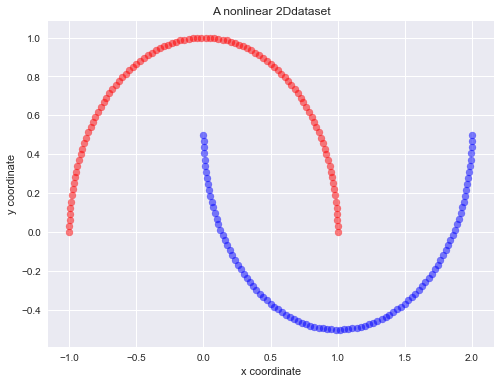

In [102]:
# try the KPCA on a smaller dimension dataset
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, random_state=123)

plt.figure(figsize=(8,6))

plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)

plt.title('A nonlinear 2Ddataset')
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')

plt.show()

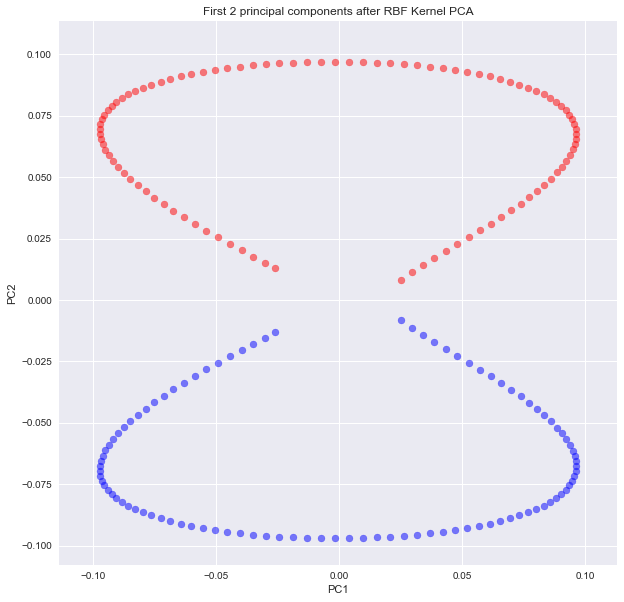

In [107]:
# perform KPCA and view 
kpca_l2 = KPCA_layer()

x = tf.placeholder(shape = [200,2],dtype = tf.float64)
reduced = kpca_l2.feedforward(x,2)
X = X.astype(np.float64)

sess = tf.Session()

sess_results = sess.run(reduced,feed_dict={x:X})
plt.figure(figsize=(10,10))
plt.scatter(sess_results[y==0, 0], sess_results[y==0, 1], color='red', alpha=0.5)
plt.scatter(sess_results[y==1, 0], sess_results[y==1, 1], color='blue', alpha=0.5)
plt.title('First 2 principal components after RBF Kernel PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

sess.close()

In [134]:
x_train.shape

(1279, 11)

In [213]:
# perform KPCA and view 
kpca_l2 = KPCA_layer()
nb_featues = x_train.shape[1] # 11 features 

#################################################
########## Parameters to tune with backprop ######
##################################################
n_components = tf.placeholder(shape=[],dtype=tf.int64)
gamma = tf.placeholder(shape=[],dtype=tf.float64)

x = tf.placeholder(shape = x_train.shape , dtype = tf.float64) # unknown batch size 
x_proj = kpca_l2.feedforward(x, n_components = n_components, gamma = gamma )

sess = tf.Session()

dict_train = {x: x_train, n_components: 5, gamma: 0.5}

sess_results = sess.run(x_proj, feed_dict = dict_train)

sess.close()

In [145]:
sess_results.shape

(1279, 5)

In [224]:
##################################################
######### CLASSIFICATION with Random Forest ##########
#####################################################

project_data = sess_results

##################################################
######### Fit rf on projected train data  ##########
#####################################################
rf = RandomForestClassifier(n_estimators=200, max_depth=10)
rf.fit(project_data, y_train)


##################################################
######### Project test data and predict test projected data ##########
#####################################################


input_test = tf.placeholder(shape = x_test.shape , dtype = tf.float64) # unknown batch size 
x_proj = kpca_l2.feedforward(input_test, n_components = n_components, gamma = gamma )


sess = tf.Session()
dict_test = { input_test: x_test, n_components: 5, gamma: 10}

x_test_proj = sess.run(x_proj, feed_dict = dict_test)

sess.close()

predictions = rf.predict(x_test_proj)

##########################################
########### Measure performance: AUC ##########
##########################################
roc_score_kpca = roc_auc_score(y_test, predictions)
print(roc_score_kpca)

0.5


In [194]:
# Applying Kernel PCA with sklearn 
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 5, kernel = 'rbf')

t0 = time.time()
x_train_proj = kpca.fit_transform(x_train)
t1 = time.time()
print(t1-t0)

0.6962824409632921
0.6874756449224534
0.7212220403709765
0.7017769464577975
0.6805003507131167
Avg AUC score 0.6974514846855273


In [225]:
## Plot graph AUC score vs n_components 

n_components_list = [2,5,9,11]
auc_score_list = []


for k in range(len(n_components_list)):
    roc_score_kpca_avg = 0
    for i in range(5): ## To mitigate the random process of trees construction
        
        n_features = n_components_list[k]
        kpca = KernelPCA(n_components = n_features , kernel = 'rbf')
        t0 = time.time()
        x_train_proj = kpca.fit_transform(x_train)
        t1 = time.time()
        time_kpca = t1 - t0
        ##################################################
        ######### Fit rf on projected train data  ##########
        #####################################################
        rf = RandomForestClassifier(n_estimators=200, max_depth=10)
        rf.fit(x_train_proj, y_train)


        ##################################################
        ######### Project test data and predict test projected data ##########
        #####################################################
        x_test_proj = kpca.transform(x_test)
        predictions = rf.predict(x_test_proj)


        ##########################################
        ########### Measure performance: AUC ##########
        ##########################################
        roc_score_kpca = roc_auc_score(y_test, predictions)
        roc_score_kpca_avg += roc_score_kpca/5
        
    auc_score_list.append(roc_score_kpca_avg)

##########################################
########### Measure performance: confusion matrix ##########
##########################################
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)

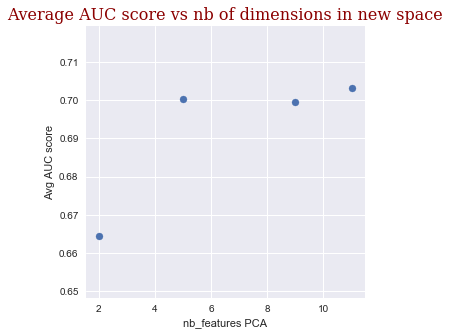

In [226]:
#### plot #####
plt.figure(figsize=(5,5))
plt.scatter( n_components_list, auc_score_list )
plt.xlabel('nb_features PCA')
plt.ylabel('Avg AUC score')
plt.title('Average AUC score vs nb of dimensions in new space', fontdict = font)
plt.show()

### COMMENTS: 
  * We note that 5 components in our PCA is a fairly good choice as there are not so much improvement when increasing the number of dimensions from this value.   


Confusion matrix, without normalization
[[267   6]
 [ 27  20]]


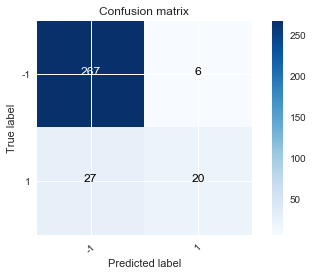

In [169]:
import itertools
import numpy as np
import matplotlib.pyplot as plt


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# Plot non normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=[-1,1], normalize=False,
                      title='Confusion matrix')

plt.show()

## SUMMARY -- RED WINE --

In [227]:
compare_table = {'Deep Auto': [time_stacked_autoencoder, roc_score_sae], 'VAE': [time_vae, roc_score_vae], 'PCA':[time_pca, roc_score_pca], 'kPCA':[time_kpca, roc_score_kpca_avg] }

compare_df = pd.DataFrame.from_dict(compare_table)
compare_df.index = ['Training time', 'AUC Score']
compare_df

,Deep Auto,VAE,PCA,kPCA
Training time,63.206465,87.969836,0.943000,0.414728
AUC Score,0.653729,0.705089,0.589899,0.703312
